In [116]:
# if the modul is not in the same directory as the notebook you are working with, first you need to add that directory to the path
# to do this, uncomment the following commands:
# import sys
# full_path_to_modul_dir = 'D:\mcbj_stmbj'  # here enter the full path to the directory that contains the modul on your computer
# sys.path.append(full_path_to_modul_dir)

from mcbj import *
import plots
import filter_traces

### Set the date of the measurement, which then sets the path to the measurement data

In [2]:
date = "23_08_10"
home_folder = Path(f'//DATACENTER/BreakJunction_group/BJ_Data/{date}')

## BJ measurements

### Create a trace_pair instance:

In [3]:
trace_pair=TracePair(load_from=home_folder, trace=75)

Plot the trace pair:

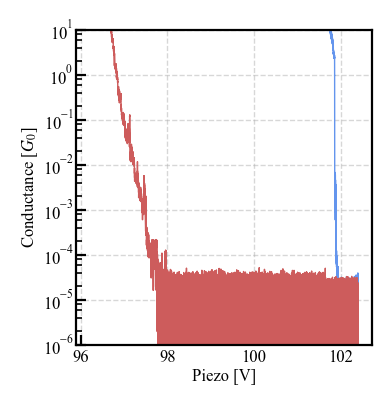

In [4]:
ax = trace_pair.plot_trace_pair(dpi=200)
# ax.set_xlim(34, 38)

Align at $0.5\;G_{0}$ an then plot

0.5


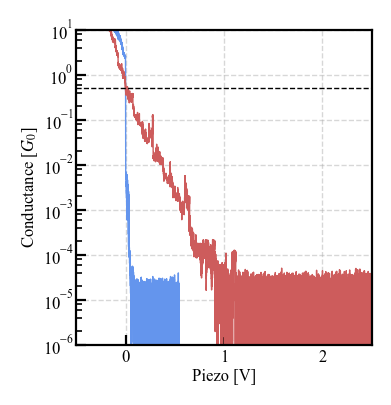

In [5]:
trace_pair.align_trace(0.5)
print(trace_pair.align_at)
ax = trace_pair.plot_trace_pair(dpi=200, aligned=True, xlim=(-0.5, 2.5))
ax.axhline(trace_pair.align_at, ls='--', lw=0.5, c='k')

### Create a histogram instance:
this tells the constructor that we want to calculate the statistics from trace `start_trace` until `end_trace`, in the given `conductance range`, you can also define the scaling (`conductance_log_scale=True` means logarithmic conductance scaling), the number of bins is `conductance_bins_num`, `conductance_bins_mode='total'` means that you have a total of 100 bins, see documentation for more info.

In [6]:
hist = Histogram(folder=home_folder,
                 start_trace=3595, end_trace=6375,
                 conductance_range=(1e-5, 10),
                 conductance_log_scale=True,
                 conductance_bins_num=100,
                 conductance_bins_mode='total')

Now that you have a histogram instance, you can calculate the statistics:

In [7]:
hist.calc_stats(align_at=0.5,  # at which conductance value to align the traces
                interpolate=True,  # use interpolation for the alignment of traces
                range_pull=(-0.5, 1),  # x axis range pull
                range_push=(-0.5, 1.5))  # x axis range push

  0%|          | 0/2781 [00:00<?, ?it/s]

Pull 2D histogram created from 2781 traces
Push 2D histogram created from 2781 traces


`hist.calc_stats` calculates the temporal histogram, the 1D & 2D histograms, and the plateau length histogram (of the $1G_0$ plateau by default, see [documentation](files/docs/build/index.html) how to change that)

Now that you calculated them, you can plot them:

Temporal histogram:

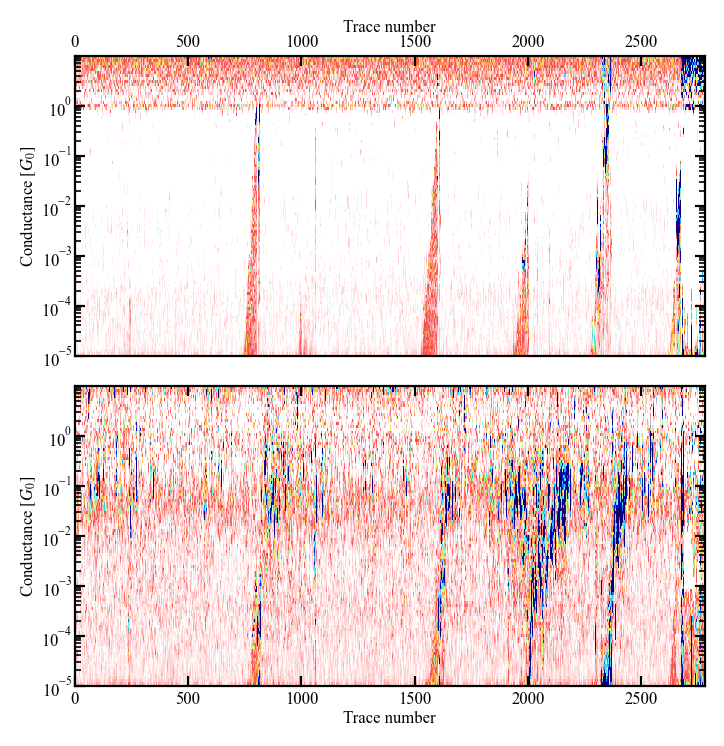

In [8]:
ax_pull, ax_push = hist.plot_temporal_hist(dpi=200, vmax_pull=1000, vmax_push=1000)

1D histogram:

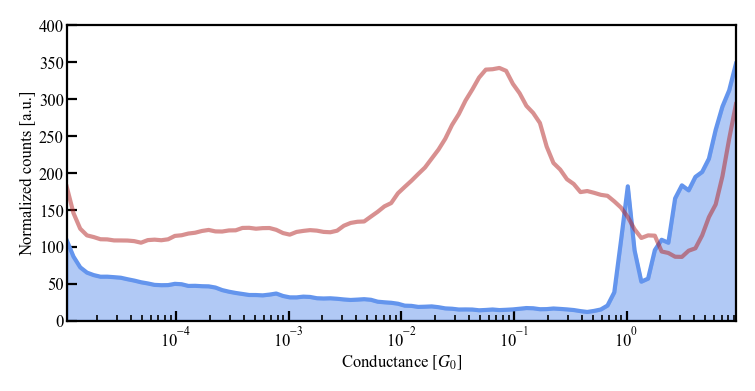

In [9]:
ax = hist.plot_hist_1d(dpi=200, ylims=(0, 400))

2D histogram:

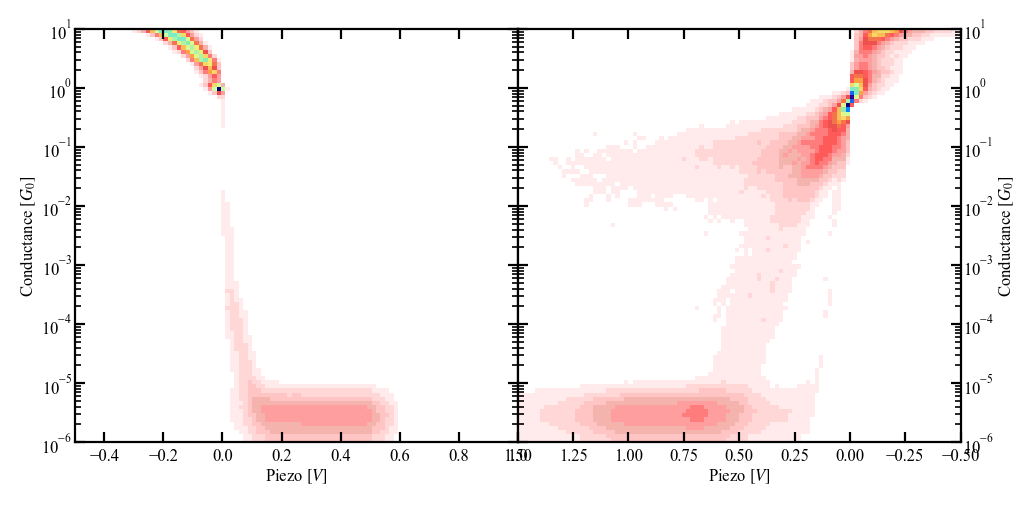

In [10]:
ax_pull, ax_push = hist.plot_hist_2d_both(dpi=200)

You can also calculate the correlation:

In [11]:
hist.calc_corr_hist_2d()

  0%|          | 0/2781 [00:00<?, ?it/s]

Then plot:

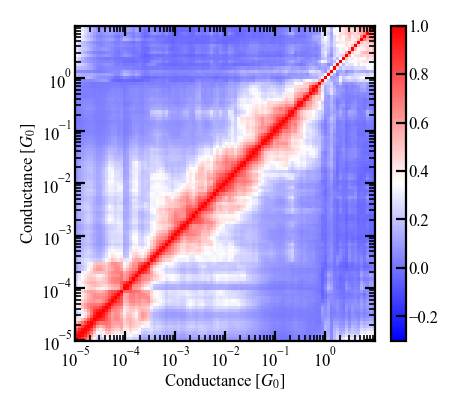

In [12]:
ax = hist.plot_corr('pull', dpi=200, vmin=-0.3, vmax=1)

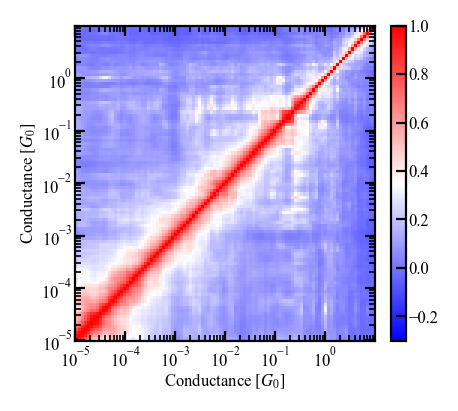

In [13]:
ax = hist.plot_corr('push', dpi=200, vmin=-0.3, vmax=1)

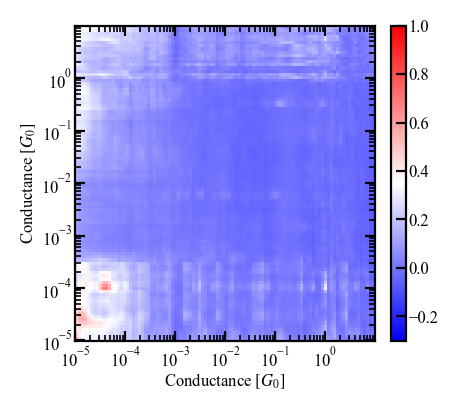

In [14]:
ax = hist.plot_corr('cross', dpi=200, vmin=-0.3, vmax=1)

## Hold measurements

### Creating a Hold instance

In [27]:
# which_trace = 6269
which_trace = 6376
trace_pair = TracePair(which_trace, load_from=home_folder)

hold_trace = HoldTrace(which_trace, load_from=home_folder,
                       bias_offset=0, r_serial_ohm=trace_pair.R_serial,
                       sample_rate=trace_pair.sample_rate, min_step_len=20_000)

### Related plots

In [ ]:
trace_pair.hold_set_pull
trace_pair.hold_conductance_pull

<AxesSubplot:xlabel='Piezo [V]', ylabel='Conductance [$G_{0}$]'>

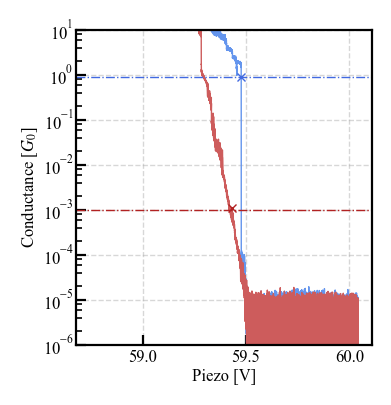

In [28]:
trace_pair.plot_trace_pair(dpi=200, plot_trigger=True)  # shows the set values for the hold measurements with dotted line, and the trigger values that signaled with an x

(<AxesSubplot:xlabel='Time [s]', ylabel='Current [A]'>,
 <AxesSubplot:ylabel='Bias [mV]'>)

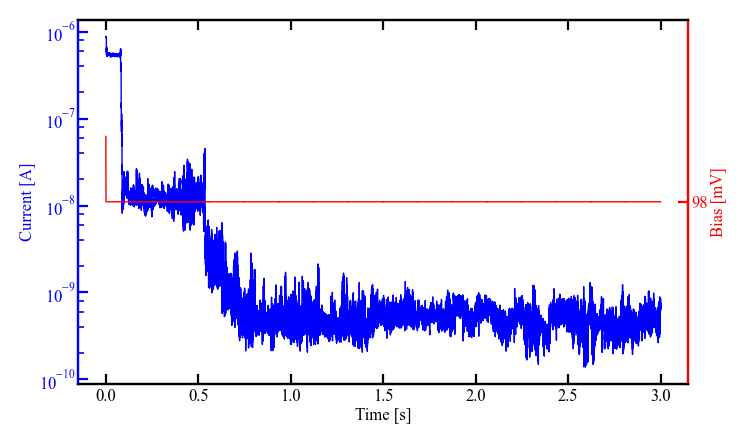

In [29]:
hold_trace.plot_hold_traces(dpi=200)

(1e-05, 0.1)

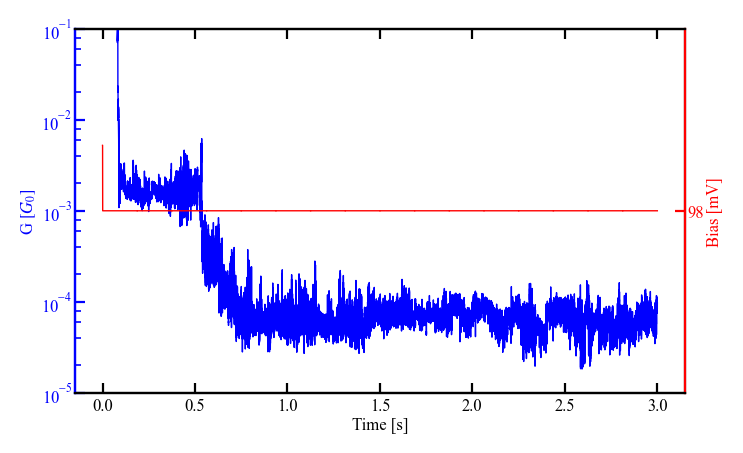

In [30]:
ax, par = hold_trace.plot_hold_traces(conductance=True, dpi=200)
ax.set_ylim(1e-5, 1e-1)

(<AxesSubplot:xlabel='Time [s]', ylabel='G $[G_{0}]$'>,
 <AxesSubplot:ylabel='Bias [mV]'>)

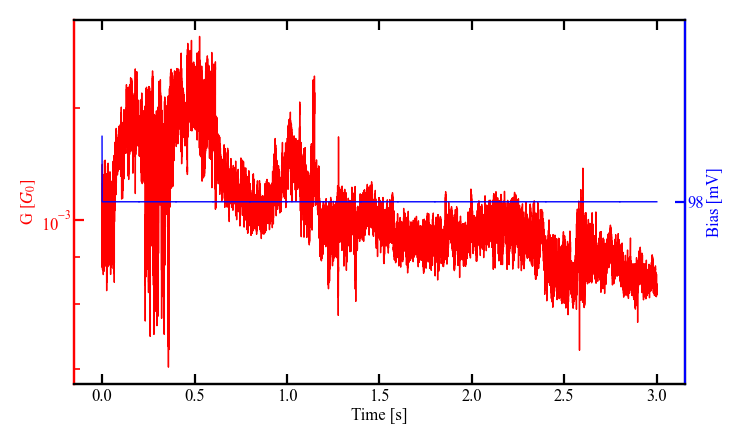

In [31]:
hold_trace.plot_hold_traces(dpi=200, direction='push', conductance=True)

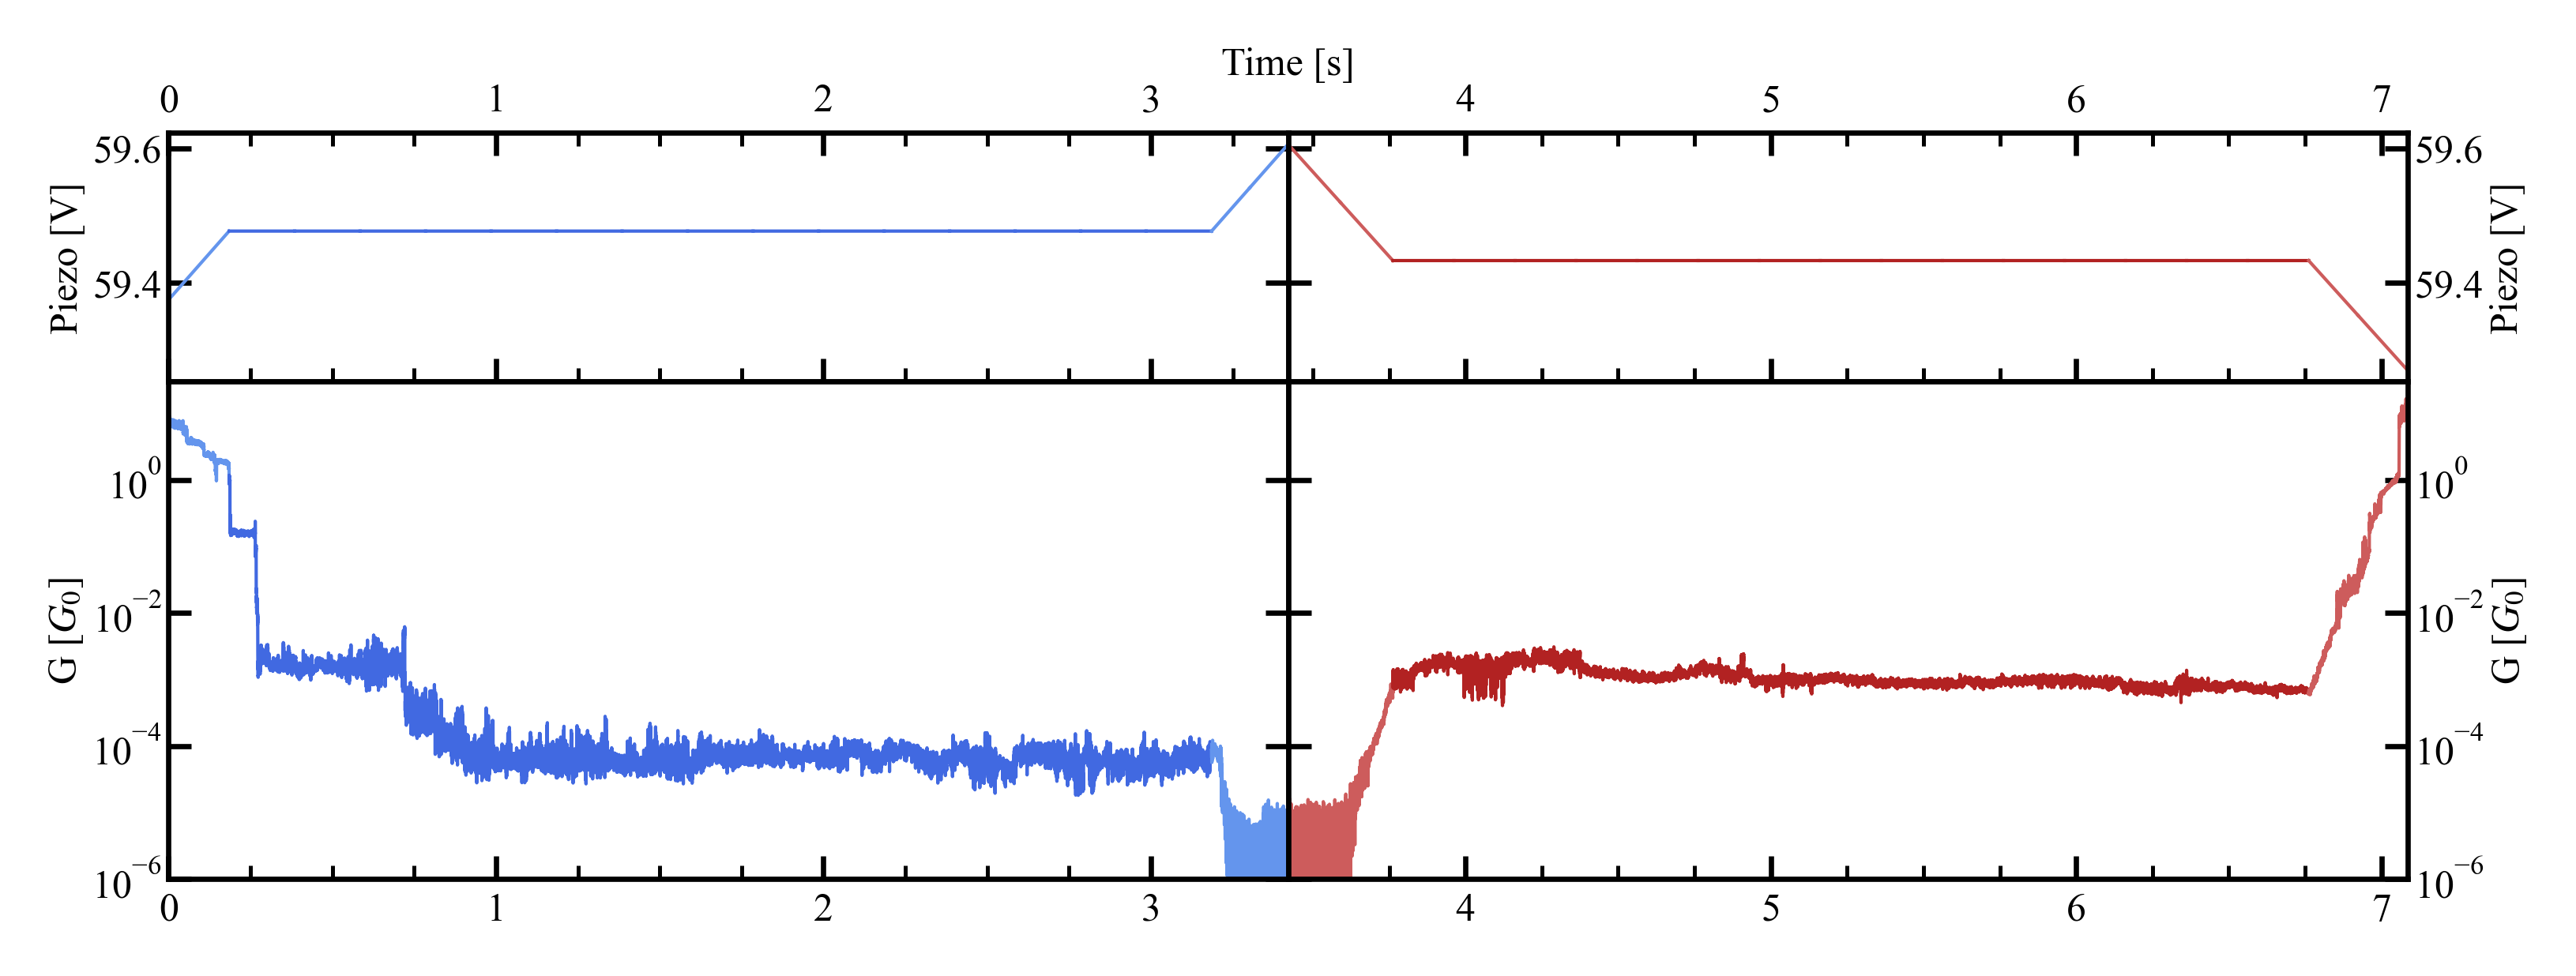

In [33]:
ax_piezo_pull, ax_cond_pull, ax_piezo_push, ax_cond_push = plots.plot_measurement_scheme_combed_both(trace_pair=trace_pair, hold_trace=hold_trace, home_folder=home_folder)

### Hold trace analysis

In [44]:
hold_trace.analyse_hold_trace(num_of_fft=8)

(<AxesSubplot:xlabel='Time [s]', ylabel='Current [A]'>,
 <AxesSubplot:ylabel='Bias [mV]'>)

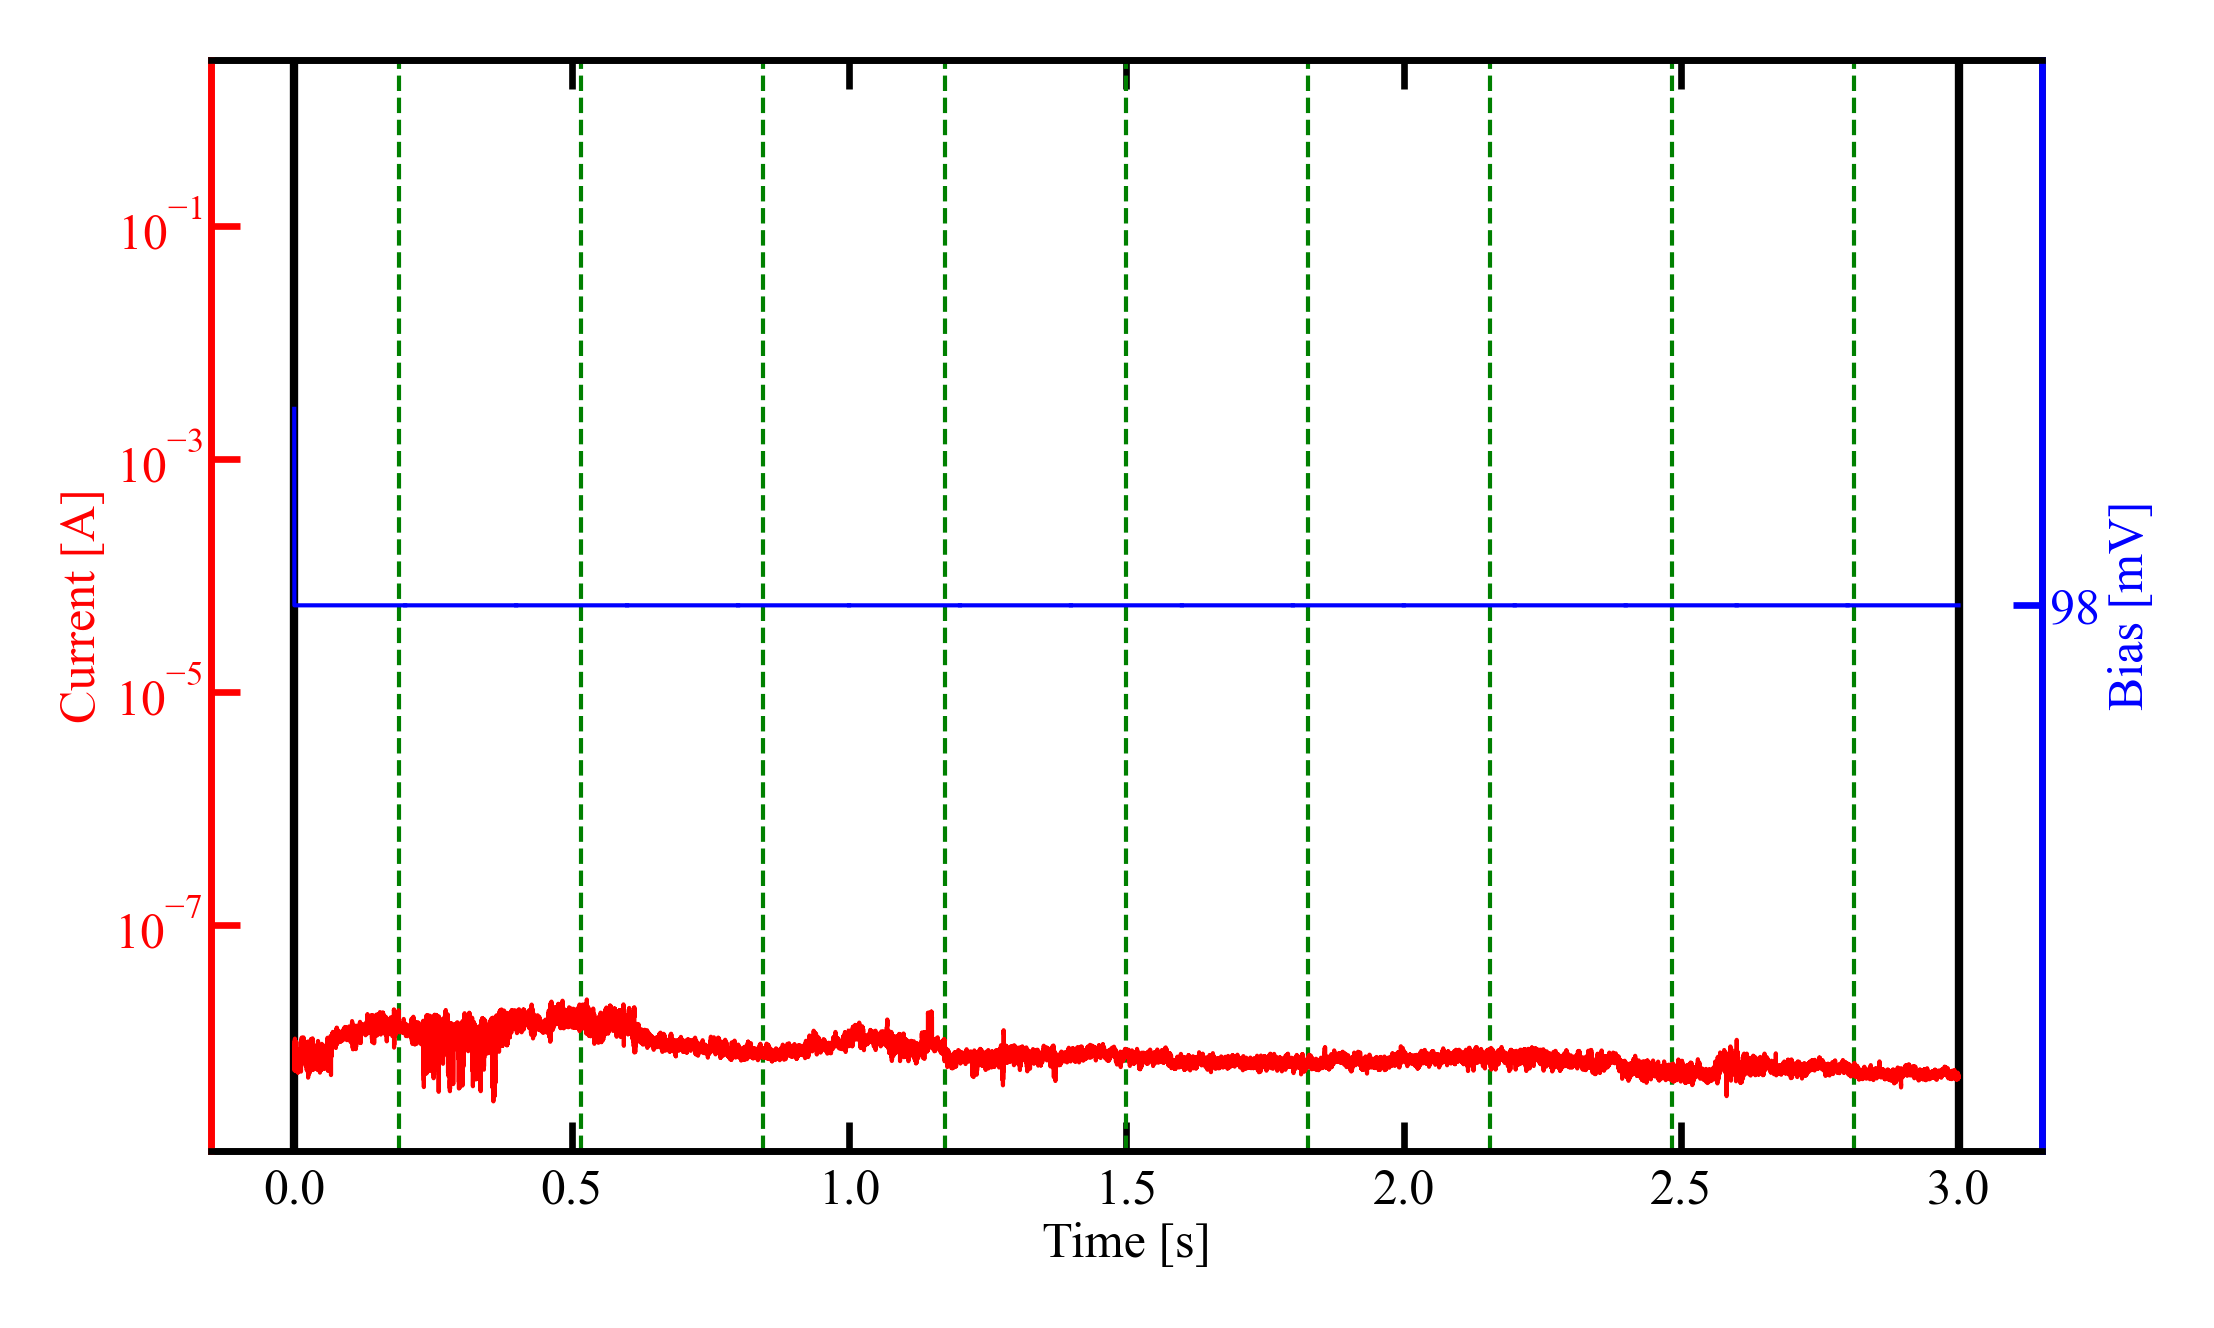

In [45]:
hold_trace.plot_hold_traces(direction='push', plot_psd_intervals=True, plot_step_ranges=True)

<AxesSubplot:xlabel='Frequency [Hz]', ylabel='$S_{I}\\;[\\mathrm{A}^2/\\mathrm{Hz}]$'>

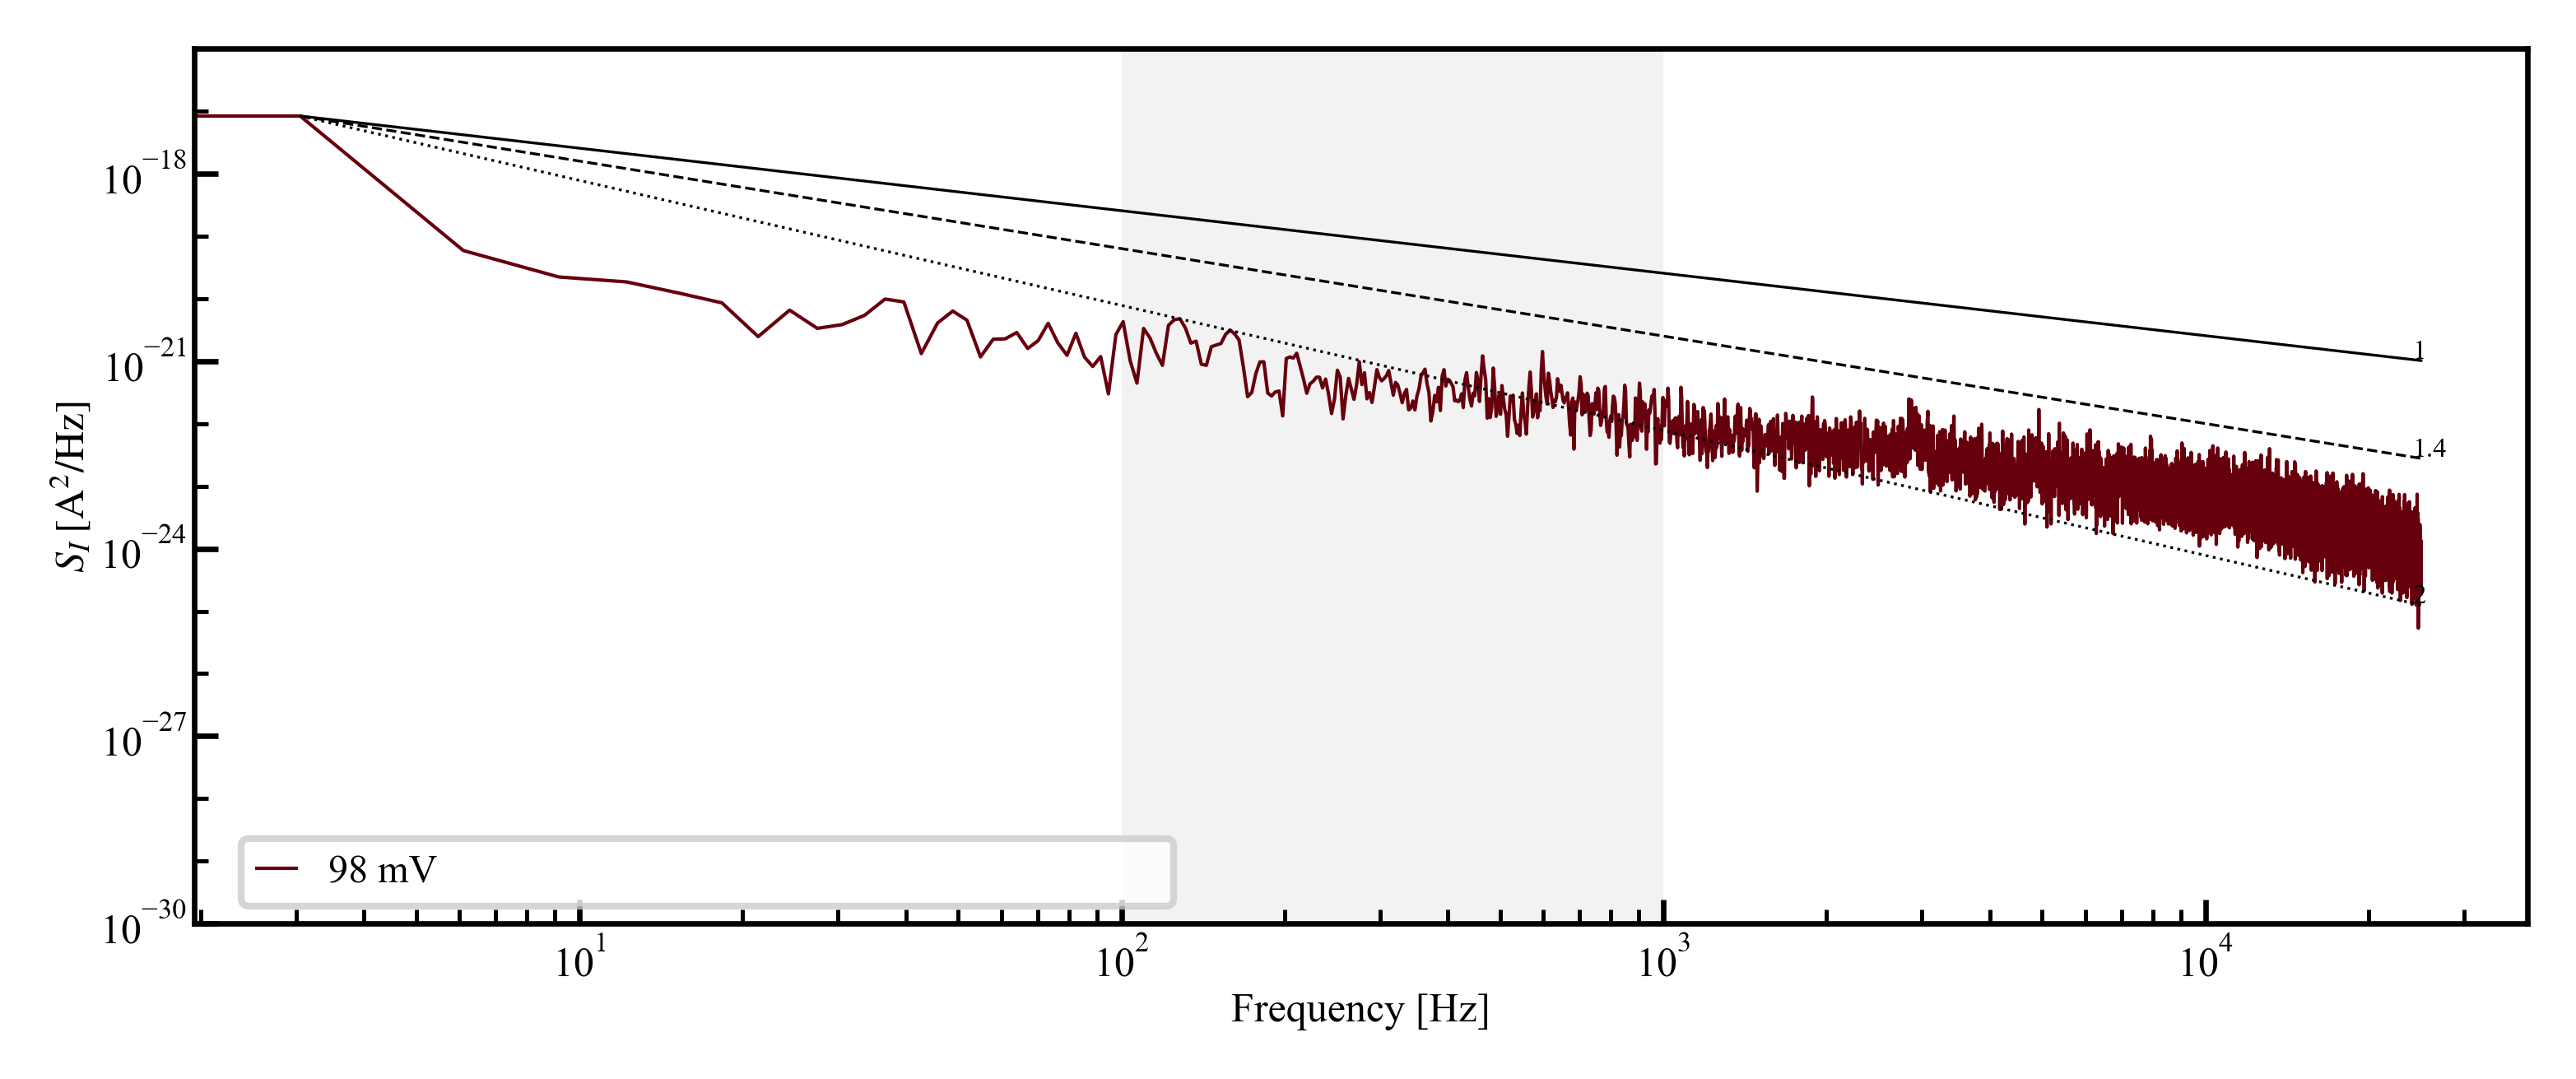

In [47]:
hold_trace.plot_psds(pull=False)

### Plotting I(V)s

In [134]:
# which_trace = 6269
# which_trace = 6376
which_trace = 10123
trace_pair = TracePair(which_trace, load_from=home_folder)

hold_trace = HoldTrace(which_trace, load_from=home_folder,
                       bias_offset=0, r_serial_ohm=trace_pair.R_serial,
                       sample_rate=trace_pair.sample_rate, min_step_len=6_000, min_height=1, iv=0)

In [135]:
hold_trace.analyse_hold_trace(num_of_fft=5)

(<AxesSubplot:xlabel='Time [s]', ylabel='Current [A]'>,
 <AxesSubplot:ylabel='Bias [mV]'>)

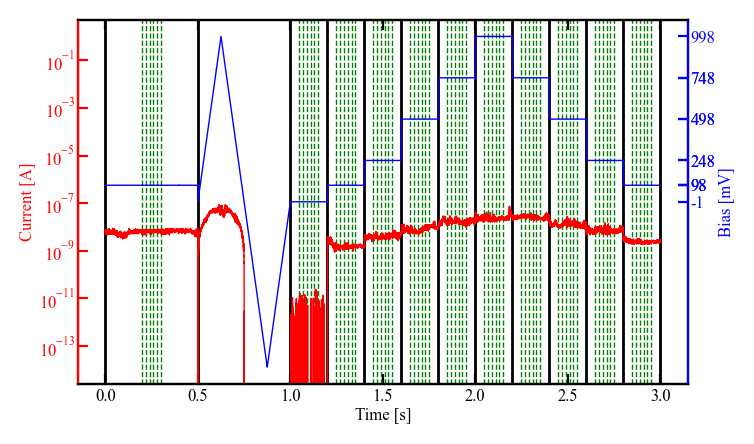

In [136]:
hold_trace.plot_hold_traces(direction='push', plot_psd_intervals=True, plot_step_ranges=True, dpi=200)

<AxesSubplot:xlabel='Piezo [V]', ylabel='Conductance [$G_{0}$]'>

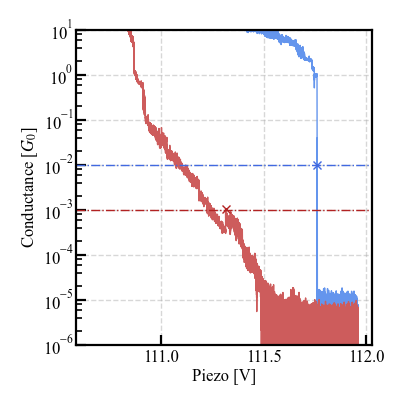

In [137]:
trace_pair.plot_trace_pair(dpi=200, plot_trigger=True)  # shows the set values for the hold measurements with dotted line, and the trigger values that signaled with an x

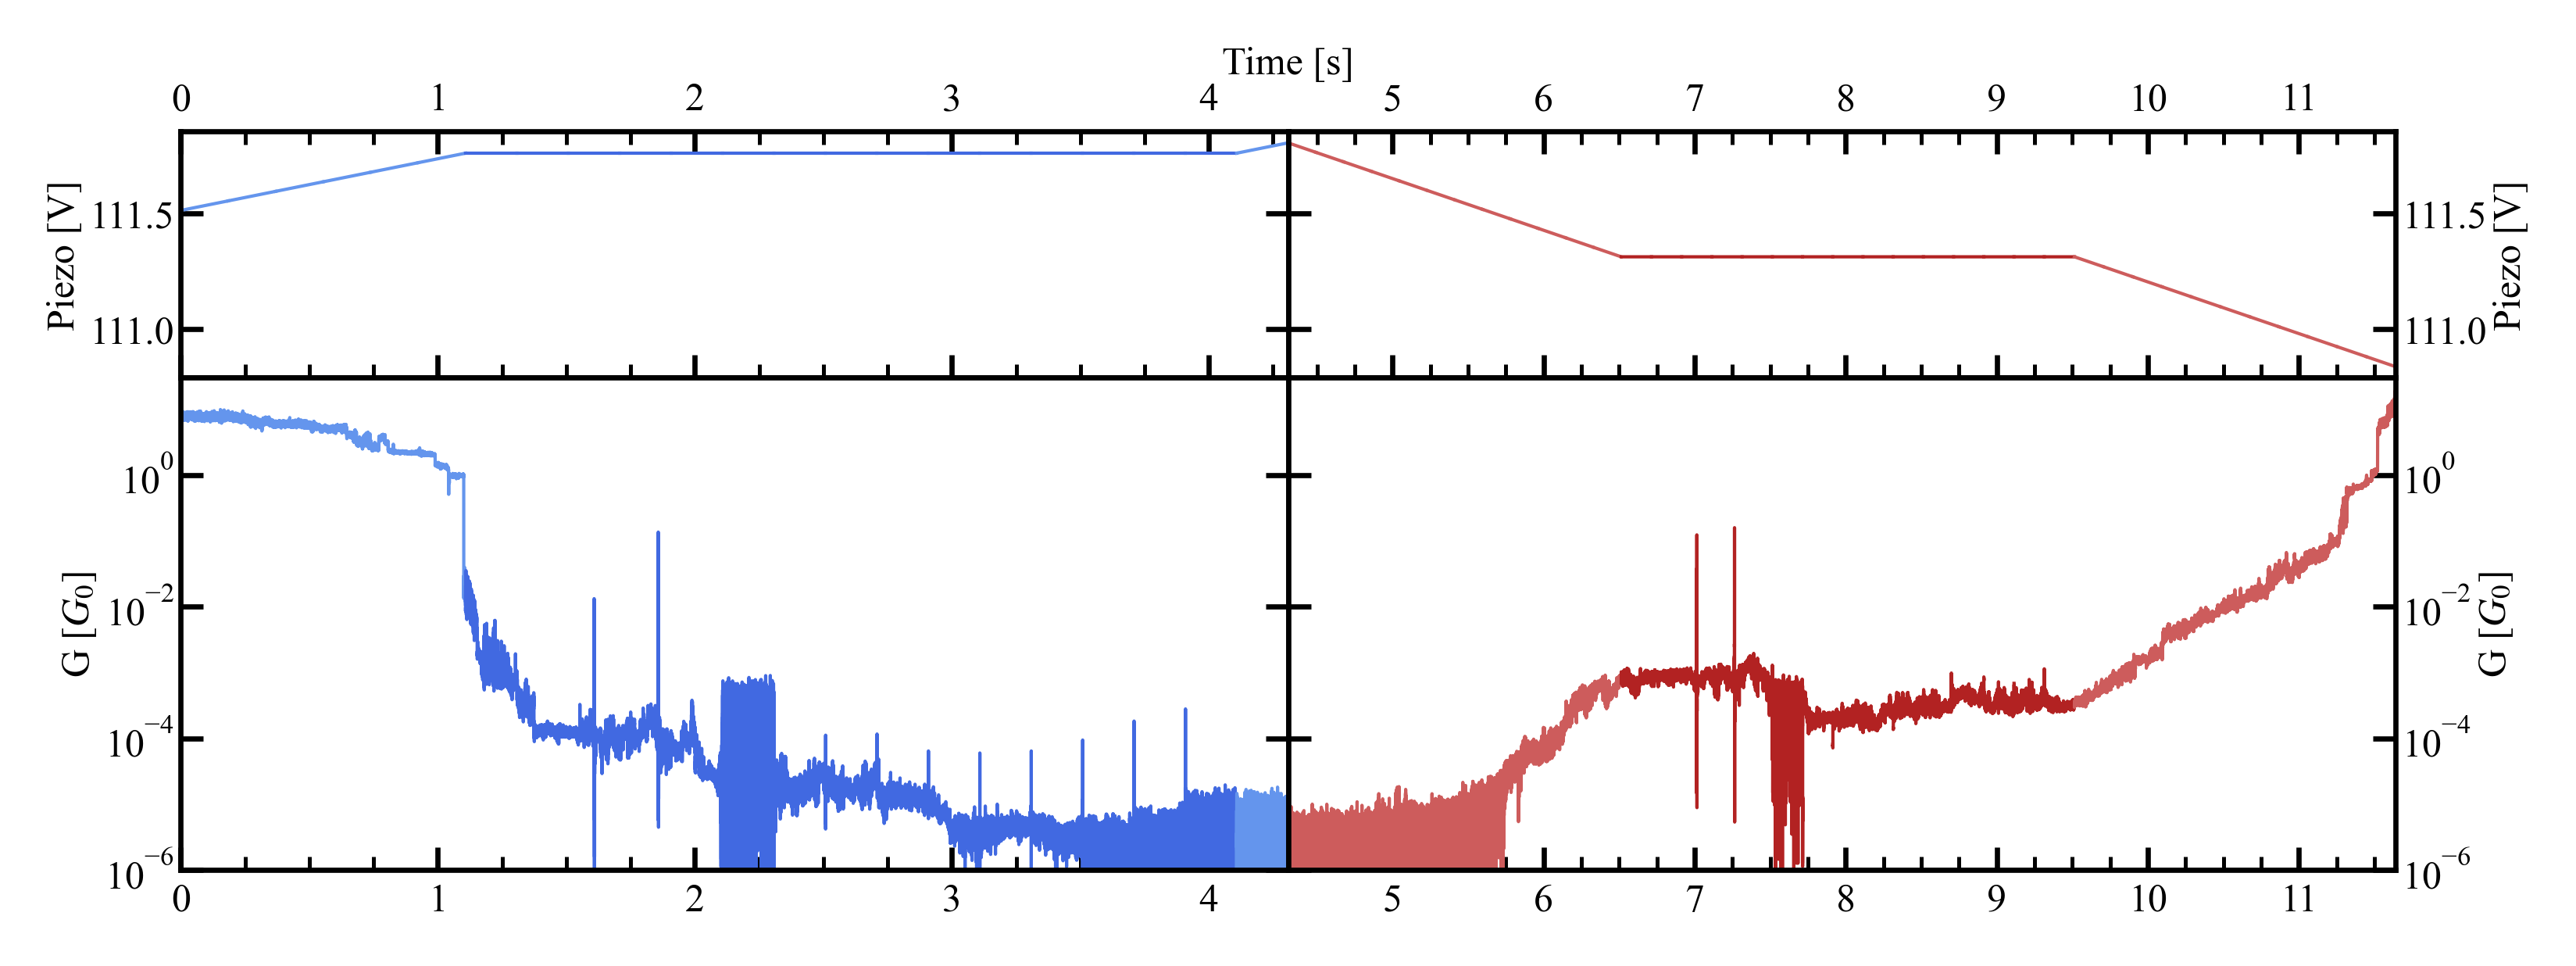

In [138]:
ax_piezo_pull, ax_cond_pull, ax_piezo_push, ax_cond_push = plots.plot_measurement_scheme_combed_both(trace_pair=trace_pair, hold_trace=hold_trace, home_folder=home_folder)

In [139]:
my_colors = np.vstack((colormaps['inferno'](np.linspace(0.2, 1, 5)[0]),
                       np.array([[0, 0, 0, 1]]),
                       colormaps['inferno'](np.linspace(0.2, 1, 5)),
                       colormaps['inferno'](np.linspace(0.2, 1, 5))[-2::-1]))

Text(0.5, 0.98, 'Trace 10123')

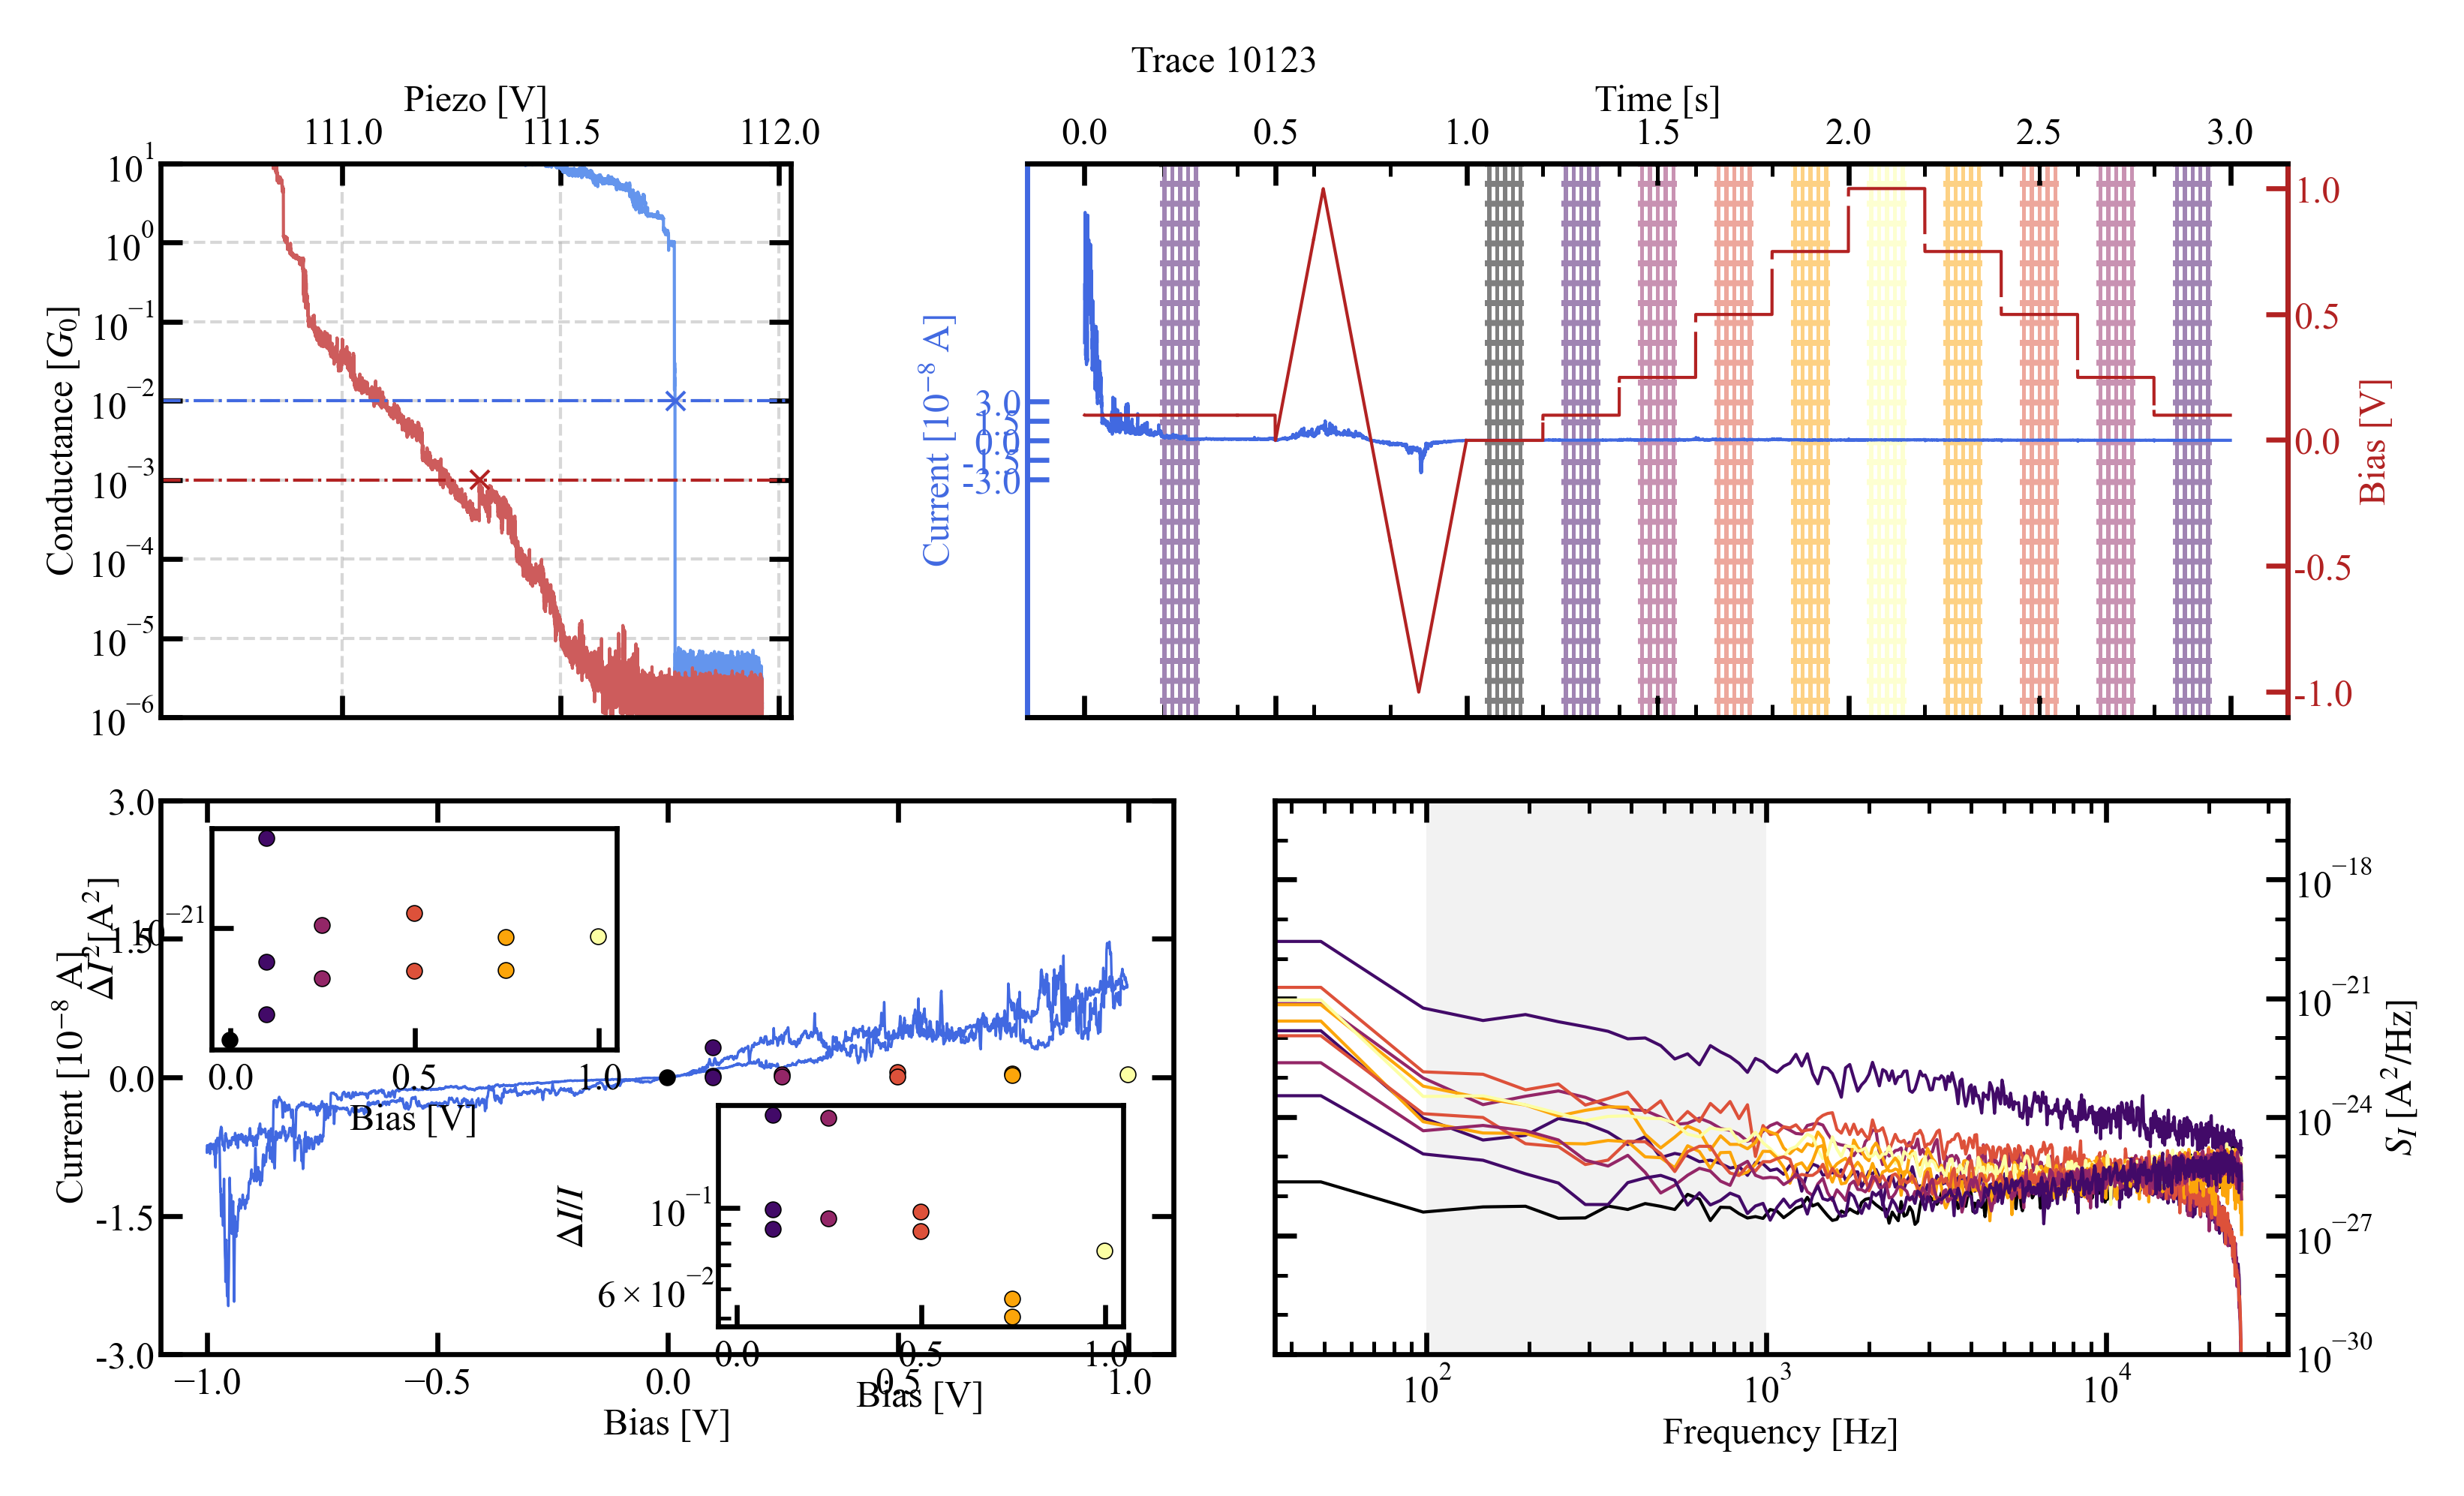

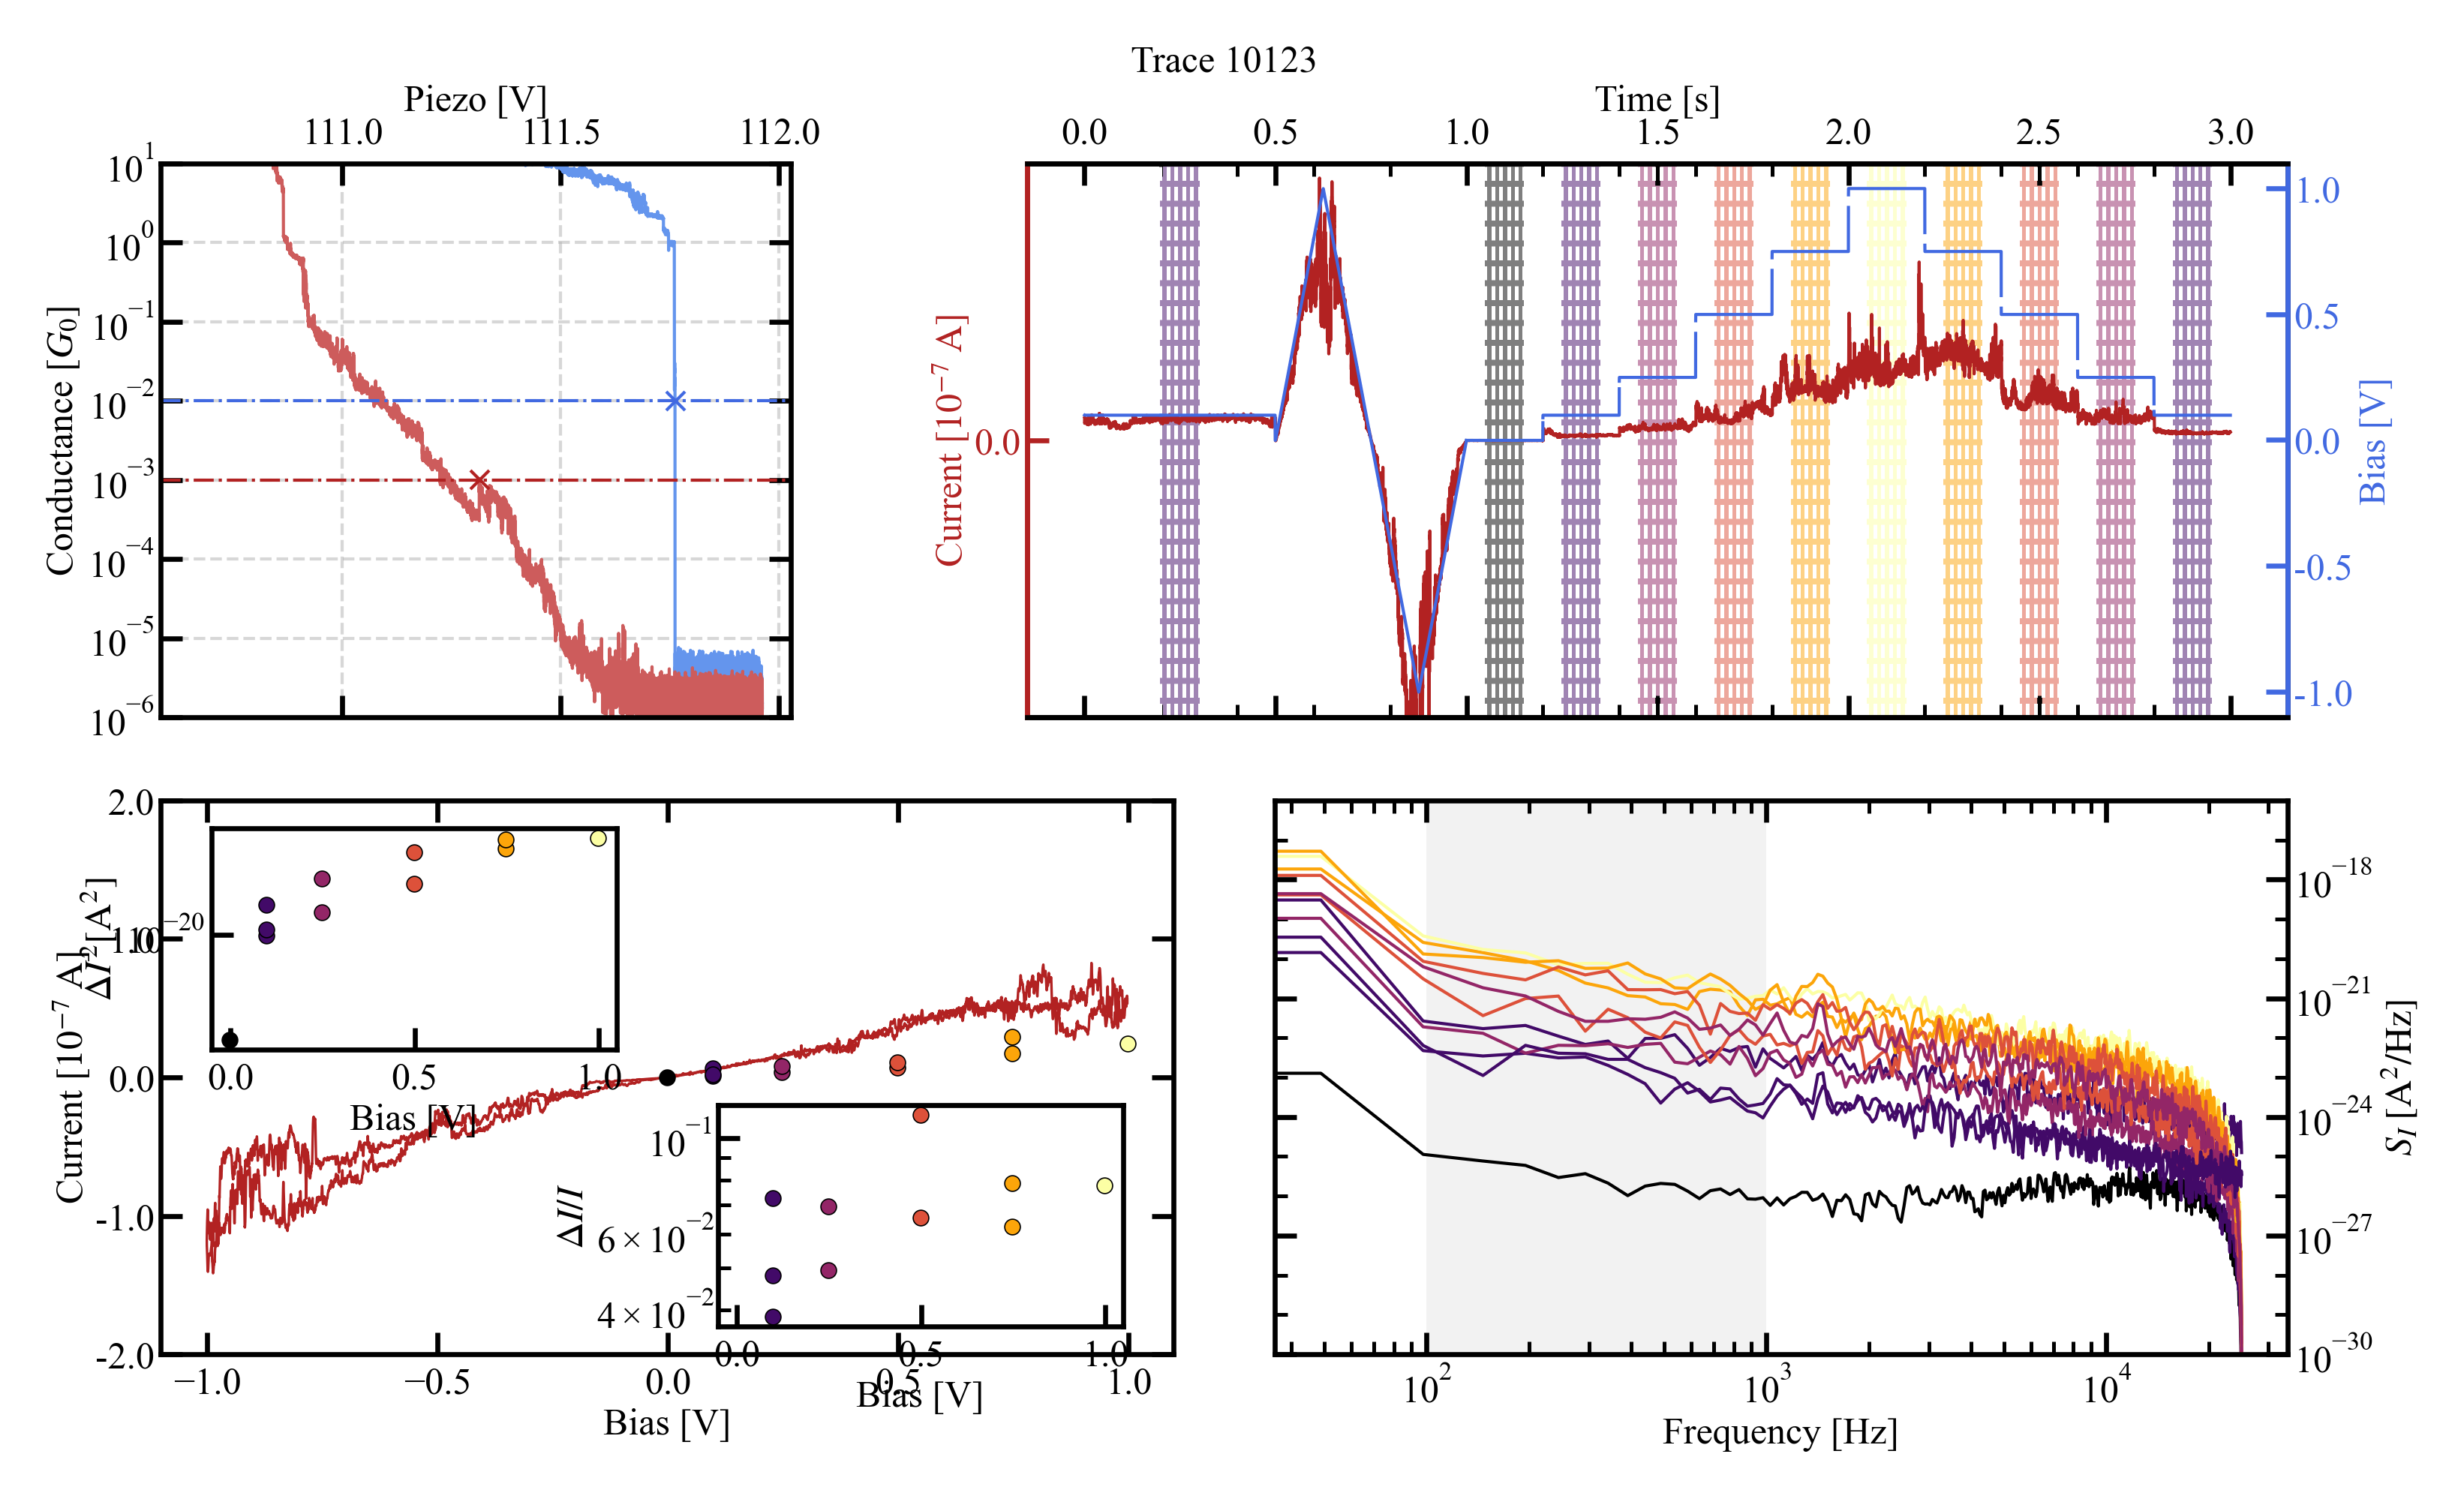

In [140]:
fig_pull, ax_trace_pull, ax_hold_pull, par_hold_pull, ax_iv_pull, ax_psd_pull = \
    plots.plot_ivs_scheme_one(trace_pair=trace_pair, hold_trace=hold_trace, direction='pull', color_list=my_colors, vline_color='white',
                              smoothing=10, which_psds=None)

ax_hold_pull.set_ylim(-1*max(hold_trace.hold_current_pull), max(hold_trace.hold_current_pull))

ax_noise_pull_1 = ax_iv_pull.inset_axes(bounds=(0.05, 0.55, 0.4, 0.4))
ax_noise_pull_2 = ax_iv_pull.inset_axes(bounds=(0.55, 0.05, 0.4, 0.4))

for i in range(len(my_colors)):
    ax_iv_pull.plot(hold_trace.bias_steps[i], hold_trace.avg_current_on_step_pull[i], marker='o', ls='', ms=2.5, markeredgecolor='k', markeredgewidth=0.2, c=my_colors[i])
    ax_noise_pull_1.plot(hold_trace.bias_steps[i], hold_trace.areas_pull[i], marker='o', ls='', ms=2.5, markeredgecolor='k', markeredgewidth=0.2, c=my_colors[i])
    ax_noise_pull_2.plot(hold_trace.bias_steps[i], hold_trace.current_noise_pull[i], marker='o', ls='', ms=2.5, markeredgecolor='k', markeredgewidth=0.2, c=my_colors[i])

ax_noise_pull_1.set_xlabel('Bias [V]')
ax_noise_pull_2.set_xlabel('Bias [V]')

ax_noise_pull_1.set_ylabel(r'$\Delta I^2 [\mathrm{A}^2]$')
ax_noise_pull_2.set_ylabel(r'$\Delta I/I$')

ax_noise_pull_1.set_yscale('log')
ax_noise_pull_2.set_yscale('log')

fig_pull.suptitle(f'Trace {which_trace}', fontsize=6)

fig_push, ax_trace_push, ax_hold_push, par_hold_push, ax_iv_push, ax_psd_push = \
    plots.plot_ivs_scheme_one(trace_pair=trace_pair, hold_trace=hold_trace, direction='push', color_list=my_colors, vline_color='white',
                              smoothing=10, which_psds=None)

ax_hold_push.set_ylim(-1*max(hold_trace.hold_current_push), max(hold_trace.hold_current_push))

ax_noise_push_1 = ax_iv_push.inset_axes(bounds=(0.05, 0.55, 0.4, 0.4))
ax_noise_push_2 = ax_iv_push.inset_axes(bounds=(0.55, 0.05, 0.4, 0.4))

for i in range(len(my_colors)):
    ax_iv_push.plot(hold_trace.bias_steps[i], hold_trace.avg_current_on_step_push[i], marker='o', ls='', ms=2.5, markeredgecolor='k', markeredgewidth=0.2, c=my_colors[i])
    ax_noise_push_1.plot(hold_trace.bias_steps[i], hold_trace.areas_push[i], marker='o', ls='', ms=2.5, markeredgecolor='k', markeredgewidth=0.2, c=my_colors[i])
    ax_noise_push_2.plot(hold_trace.bias_steps[i], hold_trace.current_noise_push[i], marker='o', ls='', ms=2.5, markeredgecolor='k', markeredgewidth=0.2, c=my_colors[i])

ax_noise_push_1.set_xlabel('Bias [V]')
ax_noise_push_2.set_xlabel('Bias [V]')

ax_noise_push_1.set_ylabel(r'$\Delta I^2 [\mathrm{A}^2]$')
ax_noise_push_2.set_ylabel(r'$\Delta I/I$')

ax_noise_push_1.set_yscale('log')
ax_noise_push_2.set_yscale('log')

fig_push.suptitle(f'Trace {which_trace}', fontsize=6)

## Filtering traces

In [118]:
pull_hold, push_hold = filter_traces.filter_hold(folder=home_folder,
                                                 filter_condition=filter_traces.does_not_break_array,
                                                 start_trace=6269, end_trace=7635, min_step_len=20_000, min_height=1, r_serial_ohm=trace_pair.R_serial)

  0%|          | 0/1367 [00:00<?, ?it/s]

In [121]:
print(pull_hold.shape[0]/(7635-6269+1))
print(push_hold.shape[0]/(7635-6269+1))

0.6086320409656182
0.9839063643013899


In [122]:
pull_hold_stab, _ = filter_traces.filter_hold(folder=home_folder,
                                                 filter_condition=filter_traces.conductances_close, max_ratio=2,
                                                 traces=pull_hold, min_step_len=20_000, min_height=1, r_serial_ohm=trace_pair.R_serial)

  0%|          | 0/832 [00:00<?, ?it/s]

In [123]:
print(pull_hold_stab.shape[0]/(7635-6269+1))

0.1485003657644477


In [125]:
_, push_hold_stab = filter_traces.filter_hold(folder=home_folder,
                                                 filter_condition=filter_traces.conductances_close, max_ratio=2,
                                                 traces=push_hold, min_step_len=20_000, min_height=1, r_serial_ohm=trace_pair.R_serial)

  0%|          | 0/1345 [00:00<?, ?it/s]

In [126]:
print(push_hold_stab.shape[0]/(7635-6269+1))

0.6825164594001463


In [130]:
which_trace = push_hold_stab[1]
trace_pair = TracePair(which_trace, load_from=home_folder)

hold_trace = HoldTrace(which_trace, load_from=home_folder,
                       bias_offset=0, r_serial_ohm=trace_pair.R_serial,
                       sample_rate=trace_pair.sample_rate, min_step_len=6_000, min_height=1)

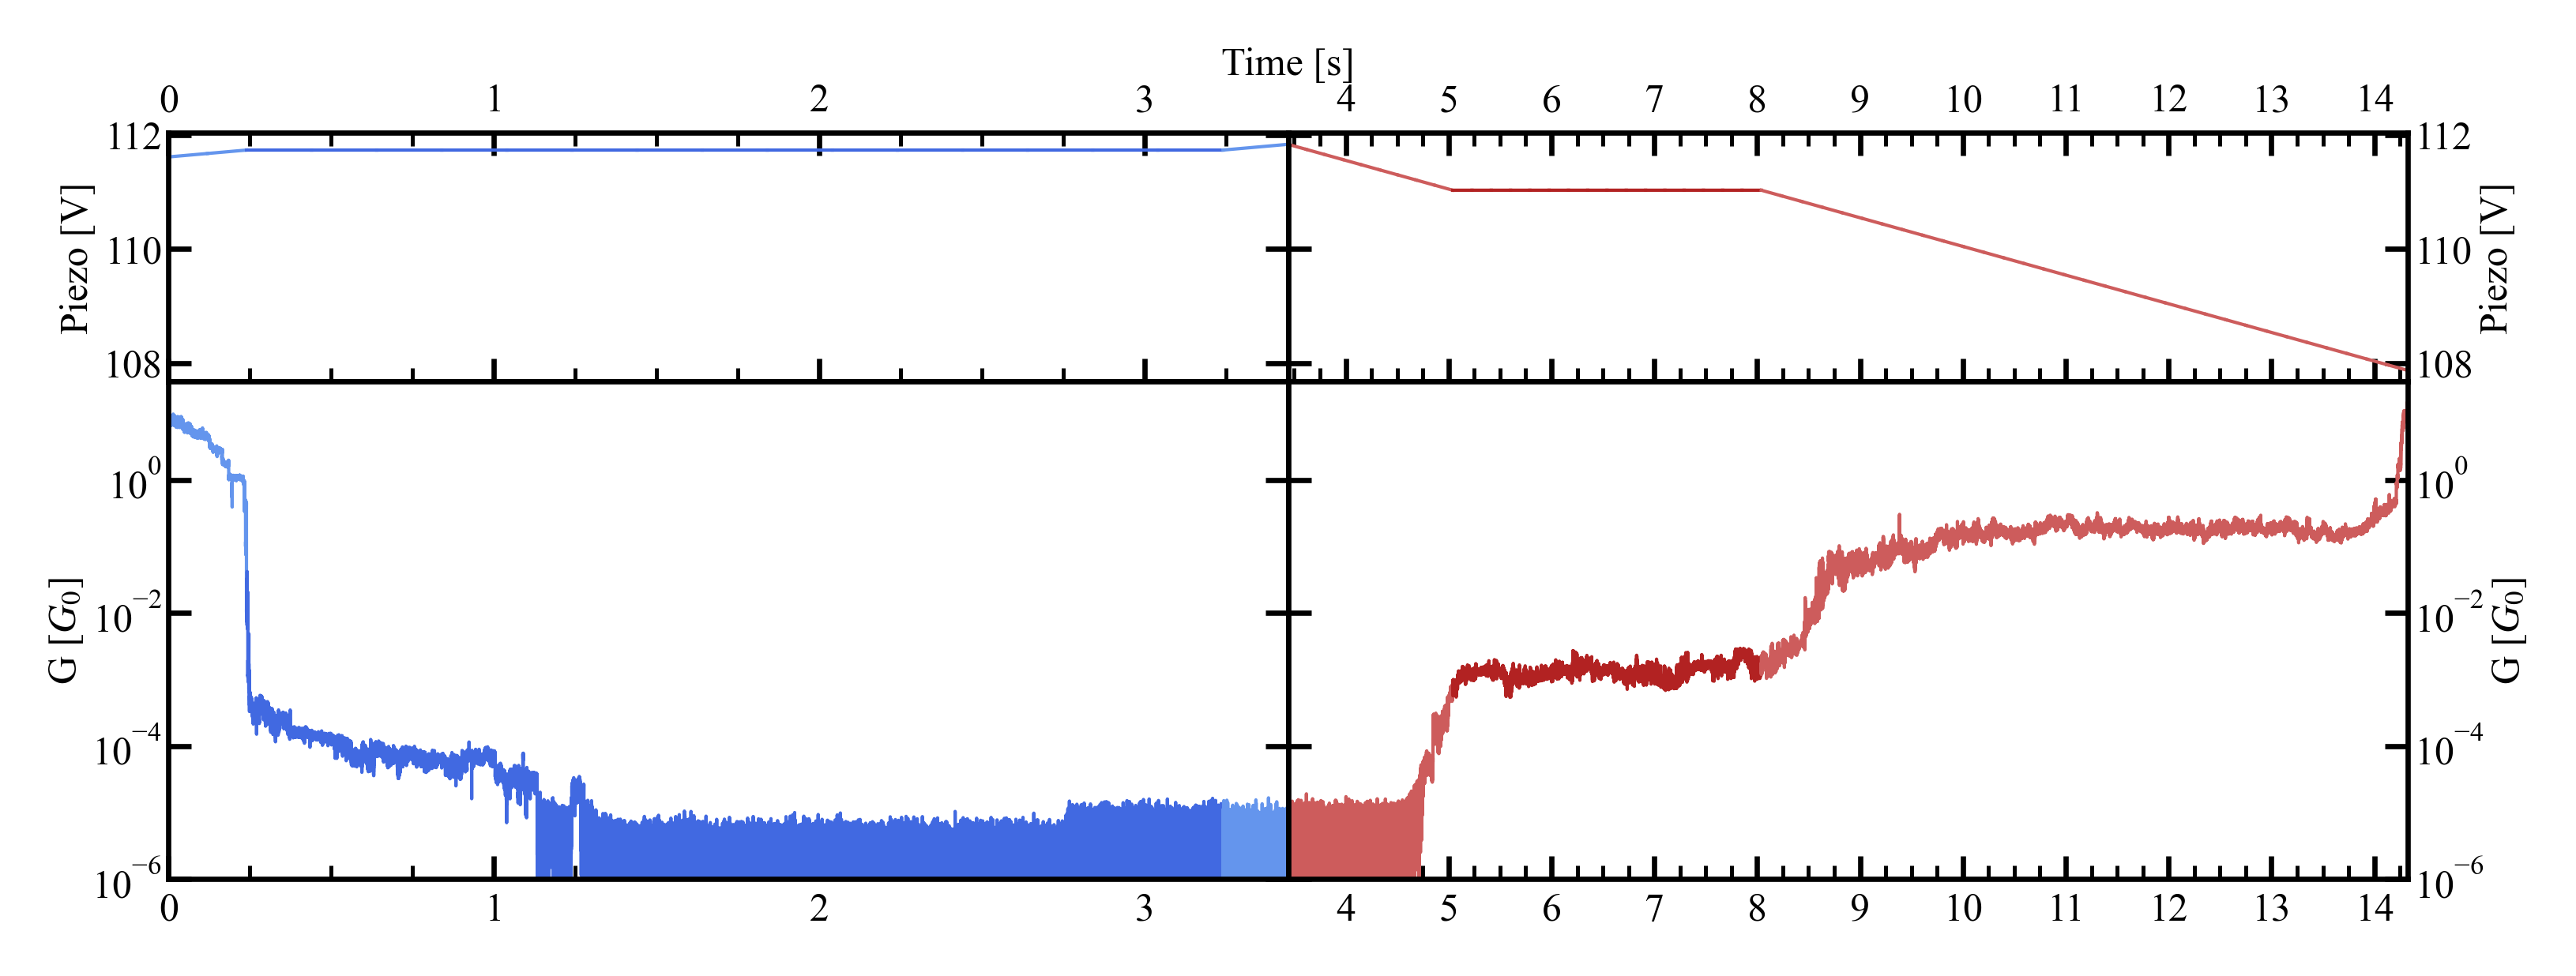

In [131]:
ax_piezo_pull, ax_cond_pull, ax_piezo_push, ax_cond_push = plots.plot_measurement_scheme_combed_both(trace_pair=trace_pair, hold_trace=hold_trace, home_folder=home_folder)

## Filter I(V) measurements

In [150]:
pull_hold_iv, push_hold_iv = filter_traces.filter_hold(folder=home_folder,
                                                       filter_condition=filter_traces.does_not_break_array,
                                                       start_trace=10122, end_trace=10225, min_step_len=6_000, min_height=1, r_serial_ohm=trace_pair.R_serial)

  0%|          | 0/104 [00:00<?, ?it/s]

In [151]:
print(pull_hold_iv.shape[0]/(10225-10122+1))
print(push_hold_iv.shape[0]/(10225-10122+1))

0.47115384615384615
1.0


In [153]:
pull_hold_stab_iv, _ = filter_traces.filter_hold(folder=home_folder,
                                                 filter_condition=filter_traces.conductances_close, max_ratio=2,
                                                 traces=pull_hold_iv, min_step_len=6_000, min_height=1, r_serial_ohm=trace_pair.R_serial, iv=0)

  0%|          | 0/49 [00:00<?, ?it/s]

D:\mcbj_stmbj\mcbj.py:2429: MeasurementOverflow: Current overflow during I(V) cycle, in pull direction.
  warnings.warn('Current overflow during I(V) cycle, in pull direction.', MeasurementOverflow)


In [155]:
print(pull_hold_stab_iv.shape[0]/(10225-10122+1))

0.2692307692307692


In [154]:
_, push_hold_stab_iv = filter_traces.filter_hold(folder=home_folder,
                                                 filter_condition=filter_traces.conductances_close, max_ratio=2,
                                                 traces=push_hold_iv, min_step_len=6_000, min_height=1, r_serial_ohm=trace_pair.R_serial)

  0%|          | 0/104 [00:00<?, ?it/s]

In [156]:
print(push_hold_stab_iv.shape[0]/(10225-10122+1))

0.9807692307692307


In [159]:
which_trace_pull = pull_hold_stab_iv[0]
trace_pair_pull = TracePair(which_trace_pull, load_from=home_folder)

hold_trace_pull = HoldTrace(which_trace_pull, load_from=home_folder,
                            bias_offset=0, r_serial_ohm=trace_pair.R_serial,
                            sample_rate=trace_pair.sample_rate, min_step_len=6_000, min_height=1, iv=0)

Text(0.5, 0.98, 'Trace 10123')

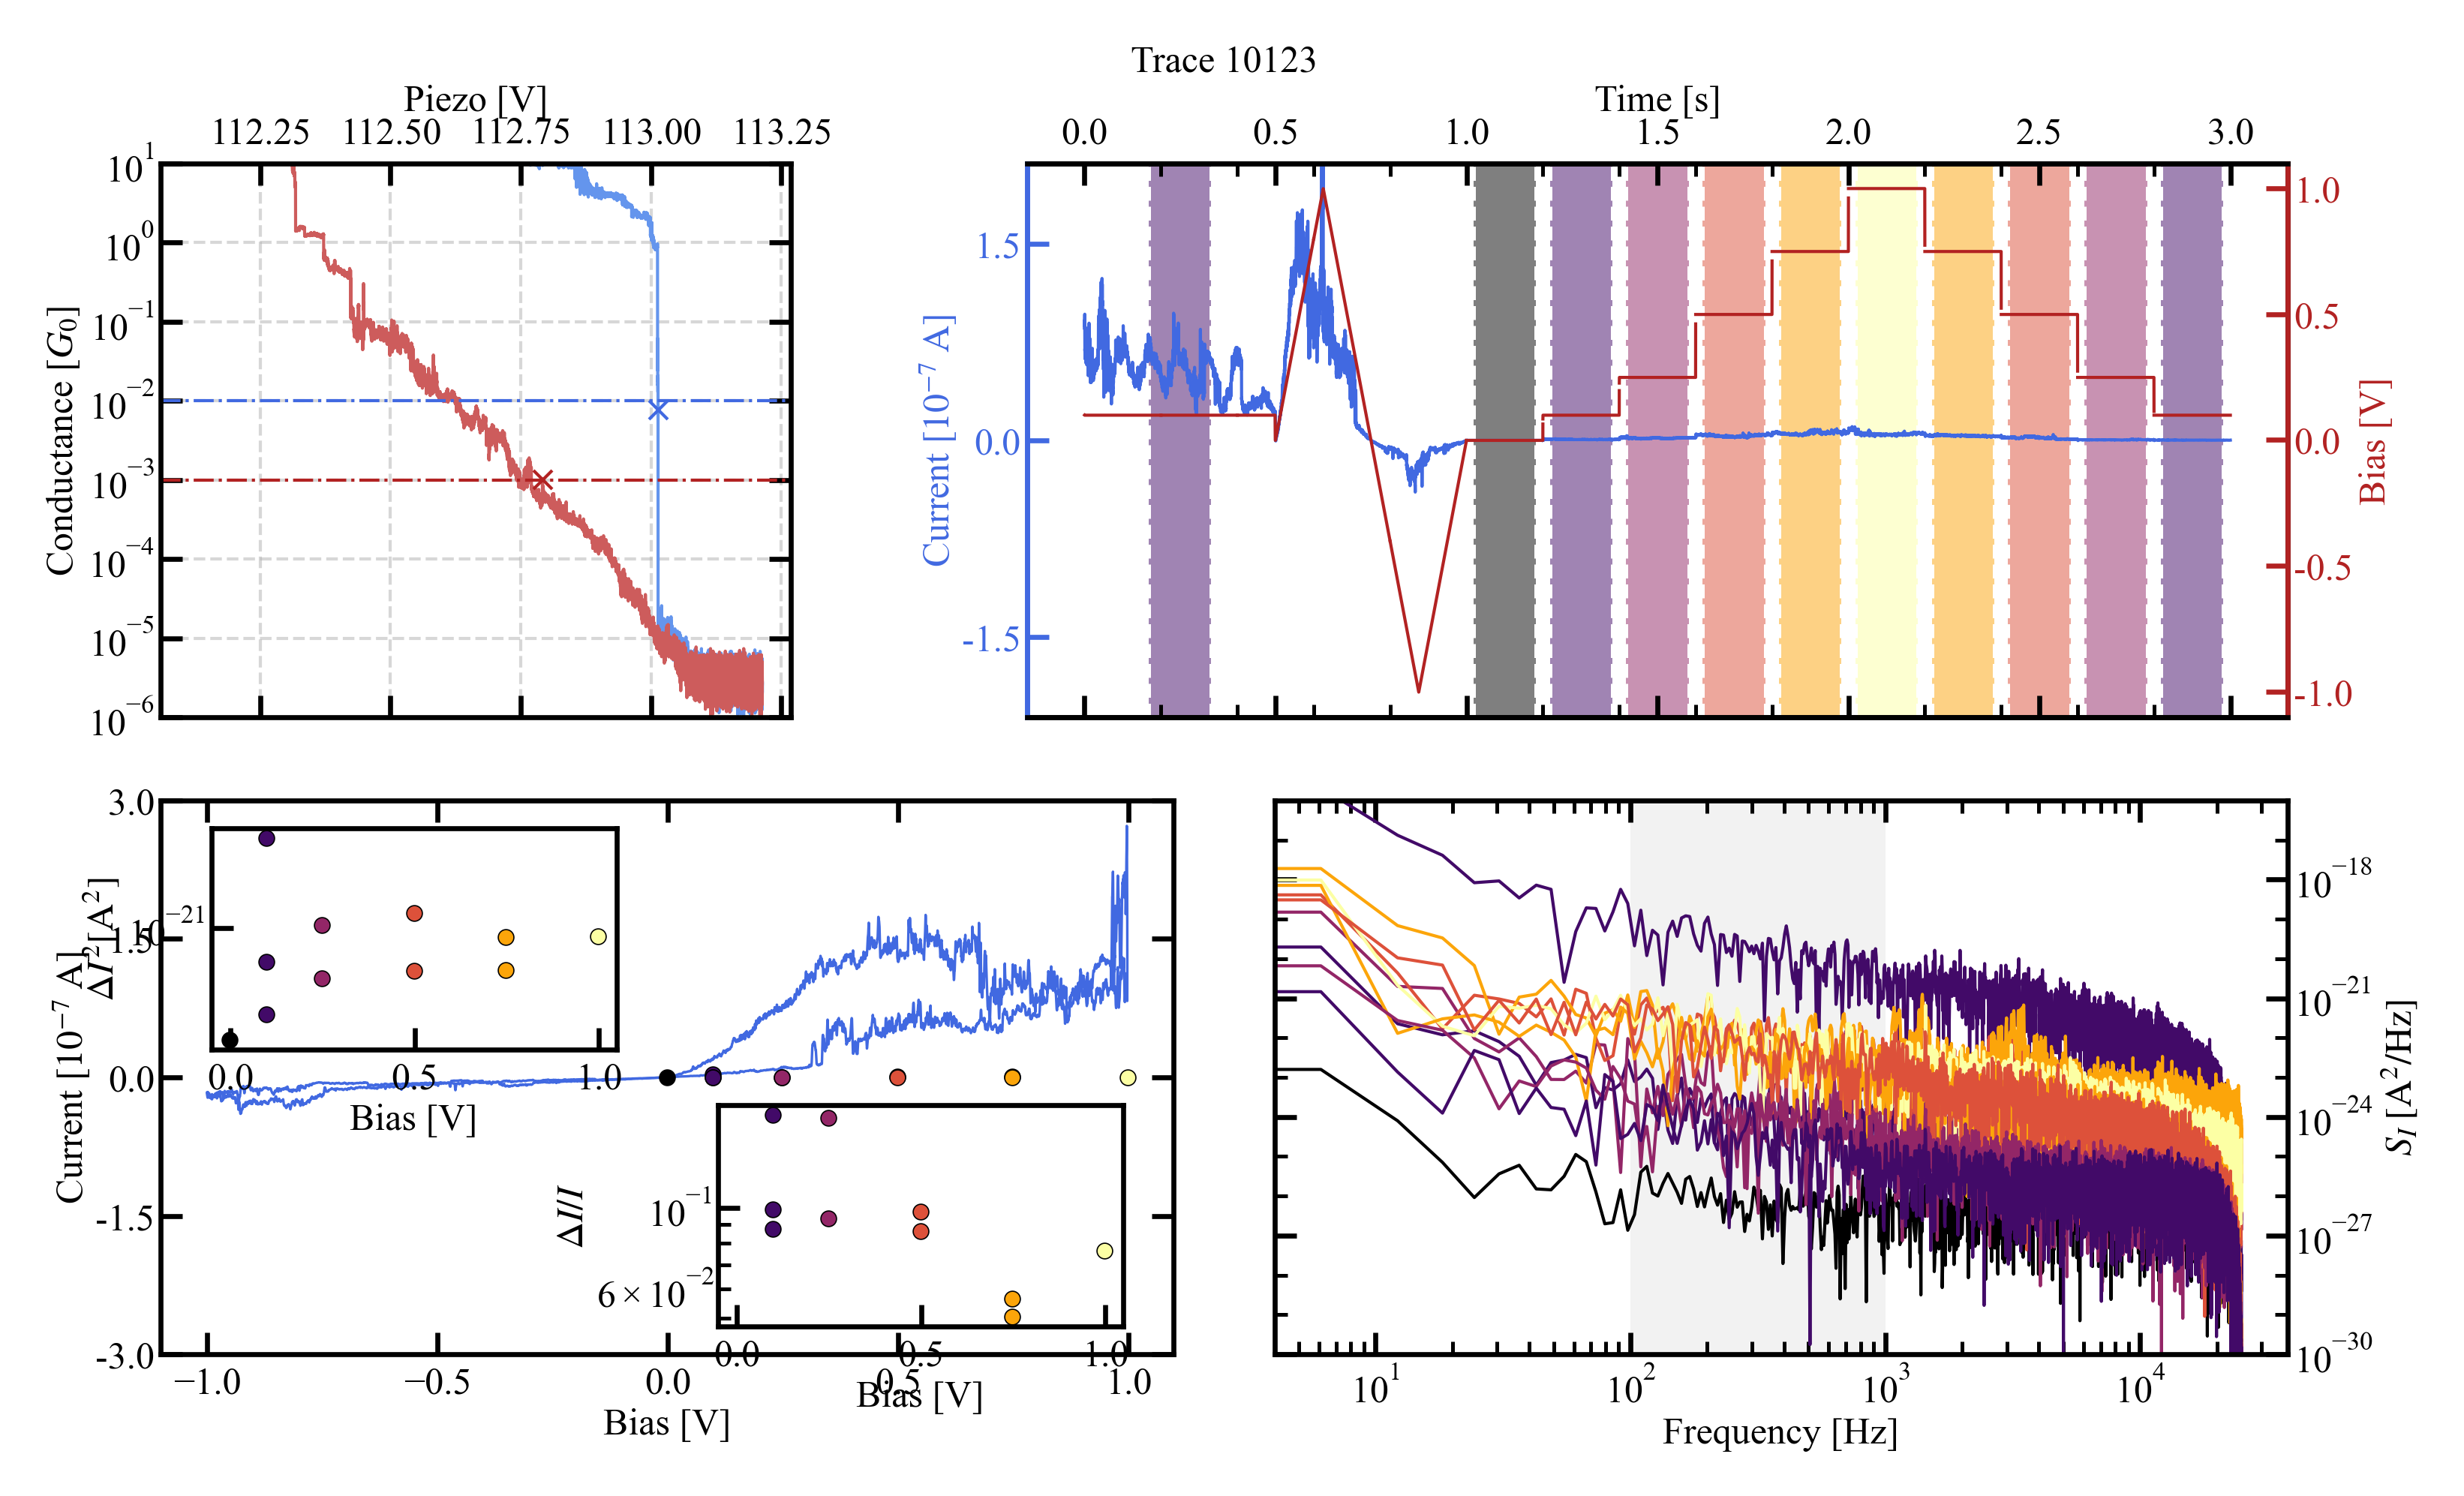

In [161]:
hold_trace_pull.analyse_hold_trace(num_of_fft=1)

fig_pull, ax_trace_pull, ax_hold_pull, par_hold_pull, ax_iv_pull, ax_psd_pull = \
    plots.plot_ivs_scheme_one(trace_pair=trace_pair_pull, hold_trace=hold_trace_pull, direction='pull', color_list=my_colors, vline_color='white',
                              smoothing=10, which_psds=None)

ax_hold_pull.set_ylim(-1*max(hold_trace.hold_current_pull), max(hold_trace.hold_current_pull))

ax_noise_pull_1 = ax_iv_pull.inset_axes(bounds=(0.05, 0.55, 0.4, 0.4))
ax_noise_pull_2 = ax_iv_pull.inset_axes(bounds=(0.55, 0.05, 0.4, 0.4))

for i in range(len(my_colors)):
    ax_iv_pull.plot(hold_trace.bias_steps[i], hold_trace.avg_current_on_step_pull[i], marker='o', ls='', ms=2.5, markeredgecolor='k', markeredgewidth=0.2, c=my_colors[i])
    ax_noise_pull_1.plot(hold_trace.bias_steps[i], hold_trace.areas_pull[i], marker='o', ls='', ms=2.5, markeredgecolor='k', markeredgewidth=0.2, c=my_colors[i])
    ax_noise_pull_2.plot(hold_trace.bias_steps[i], hold_trace.current_noise_pull[i], marker='o', ls='', ms=2.5, markeredgecolor='k', markeredgewidth=0.2, c=my_colors[i])

ax_noise_pull_1.set_xlabel('Bias [V]')
ax_noise_pull_2.set_xlabel('Bias [V]')

ax_noise_pull_1.set_ylabel(r'$\Delta I^2 [\mathrm{A}^2]$')
ax_noise_pull_2.set_ylabel(r'$\Delta I/I$')

ax_noise_pull_1.set_yscale('log')
ax_noise_pull_2.set_yscale('log')

fig_pull.suptitle(f'Trace {which_trace}', fontsize=6)

In [166]:
which_trace_push = push_hold_stab_iv[0]
trace_pair_push = TracePair(which_trace_push, load_from=home_folder)

hold_trace_push = HoldTrace(which_trace_push, load_from=home_folder,
                            bias_offset=0, r_serial_ohm=trace_pair.R_serial,
                            sample_rate=trace_pair.sample_rate, min_step_len=6_000, min_height=1, iv=0)

Text(0.5, 0.98, 'Trace 10122')

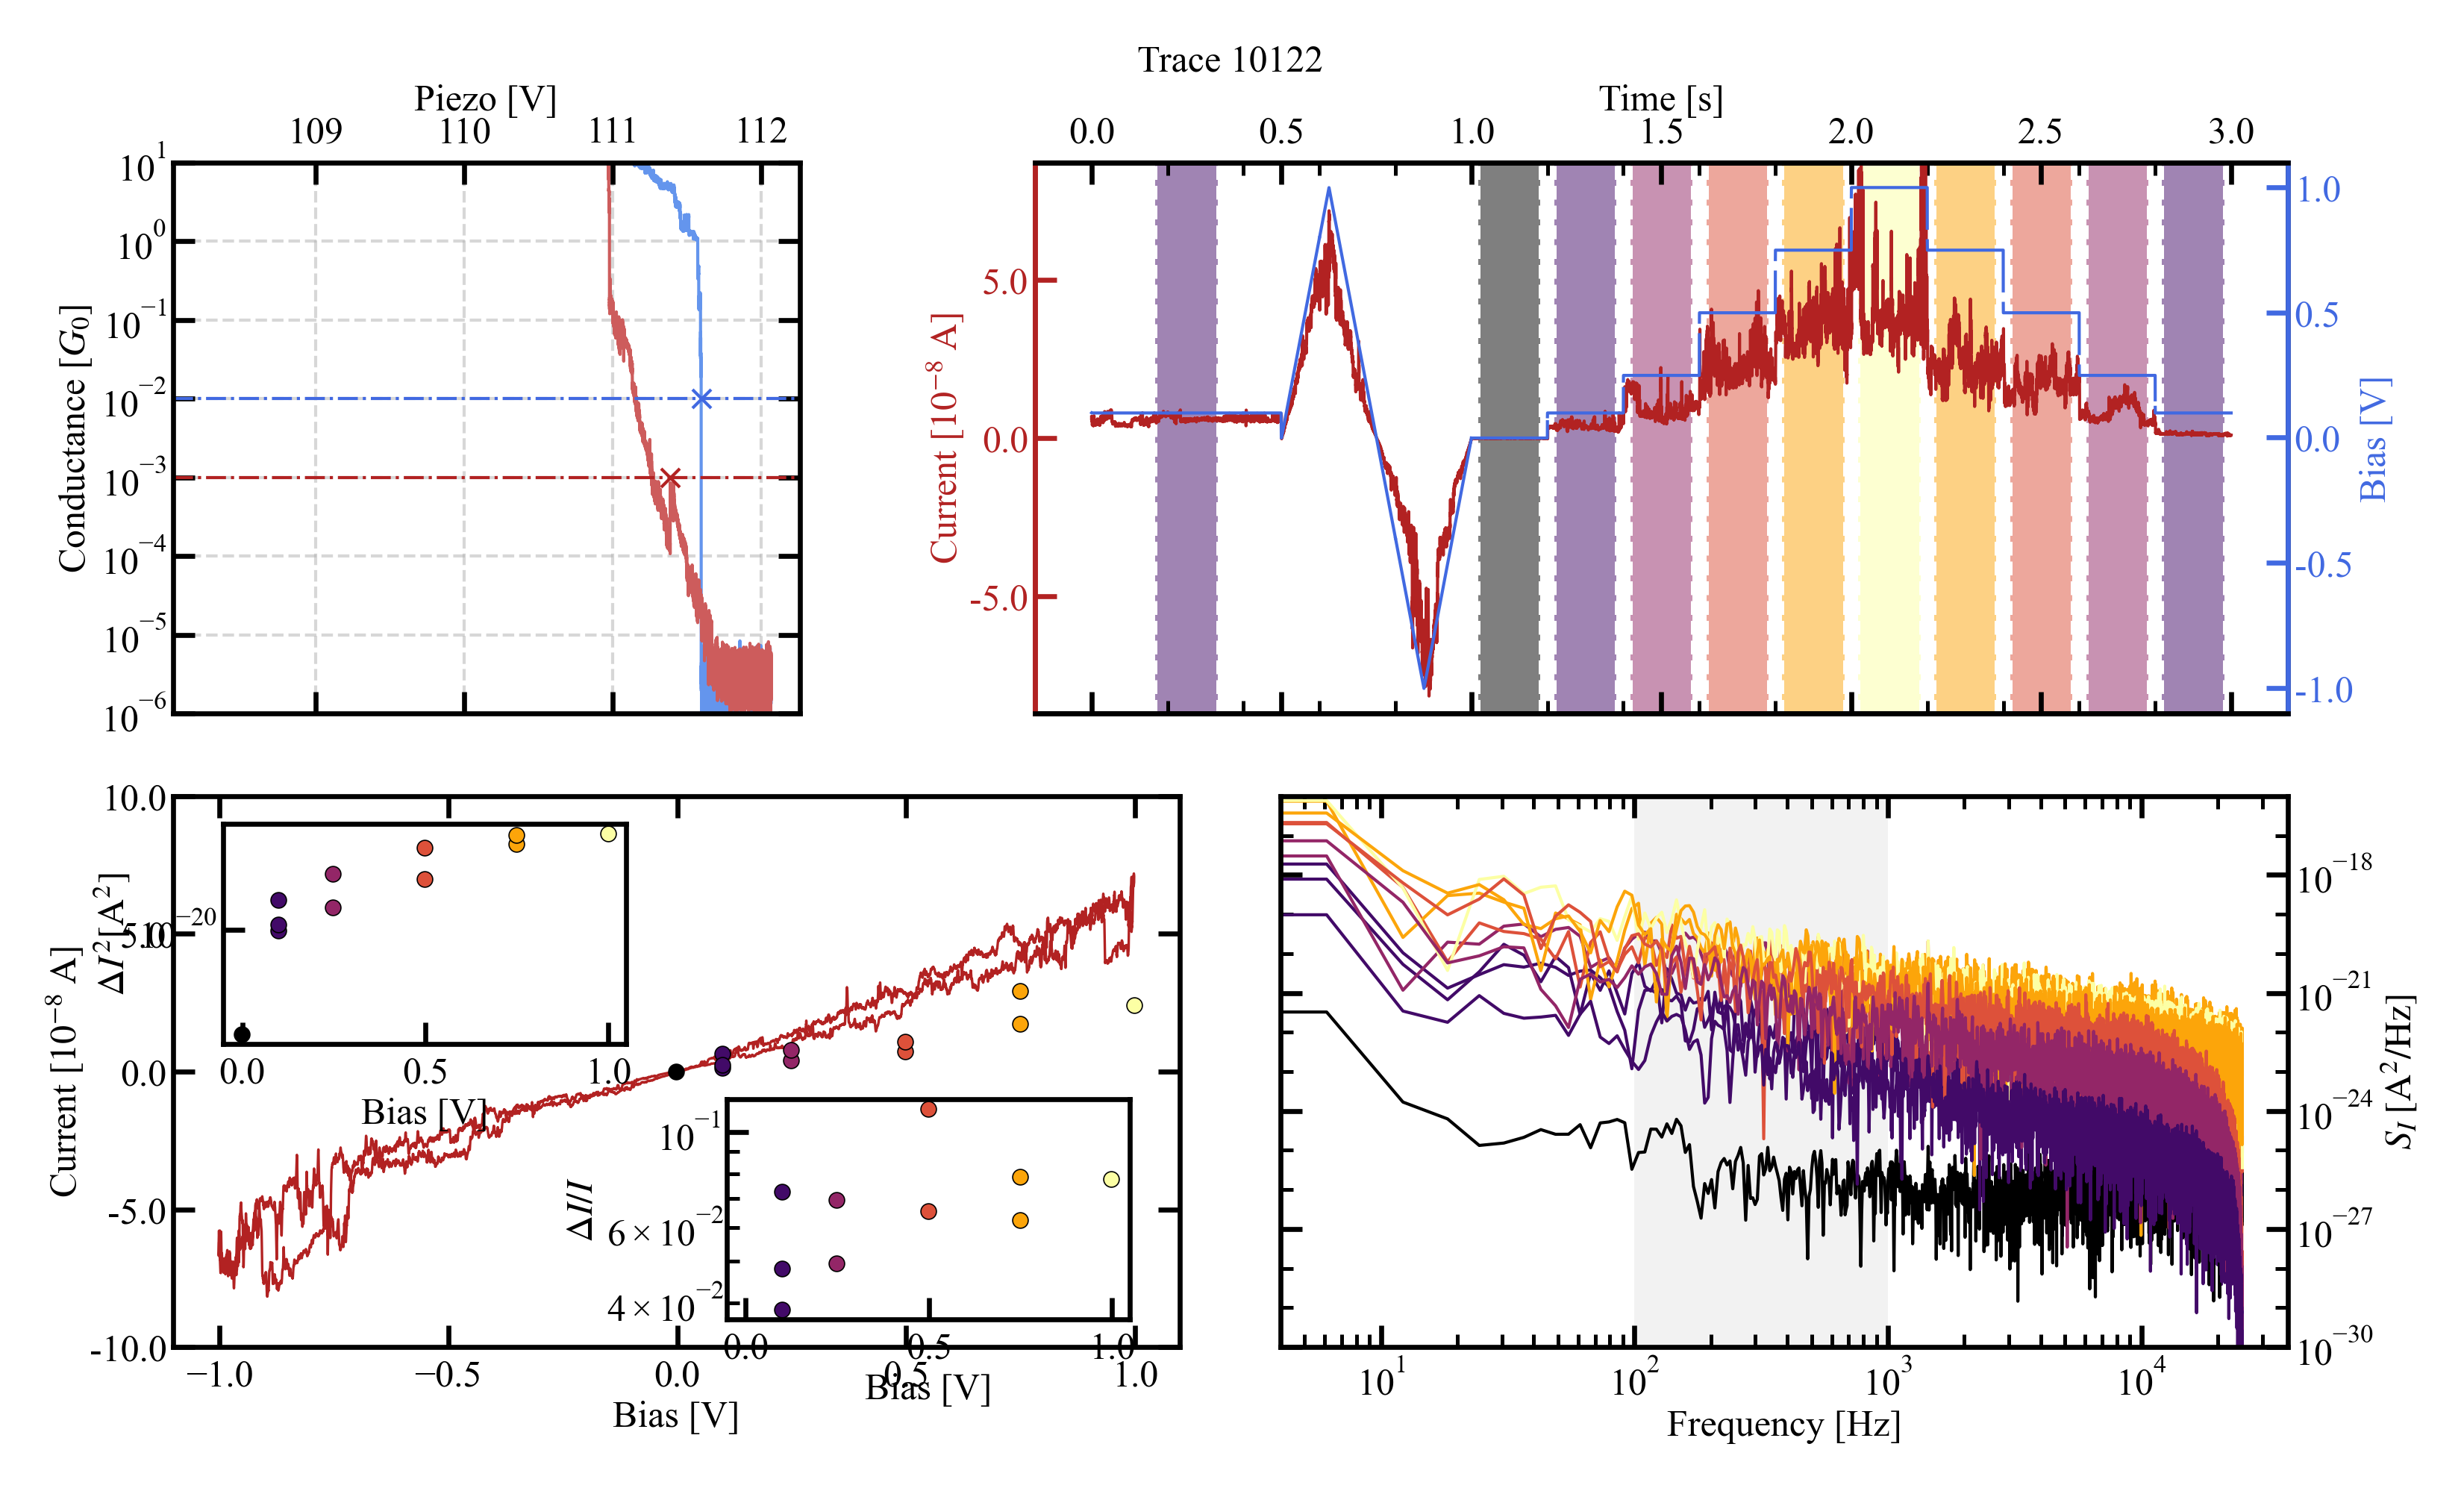

In [ ]:
hold_trace_push.analyse_hold_trace(num_of_fft=1)

fig_push, ax_trace_push, ax_hold_push, par_hold_push, ax_iv_push, ax_psd_push = \
    plots.plot_ivs_scheme_one(trace_pair=trace_pair_push, hold_trace=hold_trace_push, direction='push', color_list=my_colors, vline_color='white',
                              smoothing=10, which_psds=None)

ax_hold_push.set_ylim(-1*max(hold_trace.hold_current_push), max(hold_trace.hold_current_push))

ax_noise_push_1 = ax_iv_push.inset_axes(bounds=(0.05, 0.55, 0.4, 0.4))
ax_noise_push_2 = ax_iv_push.inset_axes(bounds=(0.55, 0.05, 0.4, 0.4))

for i in range(len(my_colors)):
    ax_iv_push.plot(hold_trace.bias_steps[i], hold_trace.avg_current_on_step_push[i], marker='o', ls='', ms=2.5, markeredgecolor='k', markeredgewidth=0.2, c=my_colors[i])
    ax_noise_push_1.plot(hold_trace.bias_steps[i], hold_trace.areas_push[i], marker='o', ls='', ms=2.5, markeredgecolor='k', markeredgewidth=0.2, c=my_colors[i])
    ax_noise_push_2.plot(hold_trace.bias_steps[i], hold_trace.current_noise_push[i], marker='o', ls='', ms=2.5, markeredgecolor='k', markeredgewidth=0.2, c=my_colors[i])

ax_noise_push_1.set_xlabel('Bias [V]')
ax_noise_push_2.set_xlabel('Bias [V]')

ax_noise_push_1.set_ylabel(r'$\Delta I^2 [\mathrm{A}^2]$')
ax_noise_push_2.set_ylabel(r'$\Delta I/I$')

ax_noise_push_1.set_yscale('log')
ax_noise_push_2.set_yscale('log')

fig_push.suptitle(f'Trace {which_trace_push}', fontsize=6)

###### 